In [681]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import re
import datetime
from imblearn.under_sampling import RandomUnderSampler
from sklearn.decomposition import PCA
from sklearn.utils import resample

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.decomposition import FactorAnalysis

In [458]:
data = pd.read_csv("LoanExport.csv",low_memory = False)

In [ ]:
data.head()

CreditScore  FirstPaymentDate FirstTimeHomebuyer  MaturityDate    MSA  MIP  \
0            0            199902                  N        202901  16974   25   
1            0            199902                  N        202901  19740    0   
2            0            199902                  N        202901  29940    0   
3            0            199902                  N        202901  31084    0   
4            0            199902                  N        202901  35644    0   

   Units Occupancy  OCLTV  DTI  ...  PostalCode    LoanSeqNum  LoanPurpose  \
0      1         O     89   27  ...       60400  F199Q1268030            P   
1      1         O     73   17  ...       80200  F199Q1015092            N   
2      1         O     75   16  ...       66000  F199Q1266886            N   
3      1         O     76   14  ...       90700  F199Q1178167            N   
4      1         O     78   18  ...        7600  F199Q1178517            N   

  OrigLoanTerm NumBorrowers SellerName          ServicerName EverDelinquent  \
0          360            2         FL  WASHINGTONMUTUALBANK              0   
1          360            1         FT  CHASEHOMEFINANCELLC               0   
2          360            2         FL  WASHINGTONMUTUALBANK              0   
3          360            2         GM  GMACMTGECORP                      0   
4          360            2         GM  GMACMTGECORP                      0   

  MonthsDelinquent MonthsInRepayment  
0                0                52  
1                0               144  
2                0                67  
3                0                35  
4                0                54  

[5 rows x 28 columns]

In [460]:
data.shape

(291451, 28)

In [461]:
data.columns

Index(['CreditScore', 'FirstPaymentDate', 'FirstTimeHomebuyer', 'MaturityDate',
       'MSA', 'MIP', 'Units', 'Occupancy', 'OCLTV', 'DTI', 'OrigUPB', 'LTV',
       'OrigInterestRate', 'Channel', 'PPM', 'ProductType', 'PropertyState',
       'PropertyType', 'PostalCode', 'LoanSeqNum', 'LoanPurpose',
       'OrigLoanTerm', 'NumBorrowers', 'SellerName', 'ServicerName',
       'EverDelinquent', 'MonthsDelinquent', 'MonthsInRepayment'],
      dtype='object')

In [462]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291451 entries, 0 to 291450
Data columns (total 28 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CreditScore         291451 non-null  int64  
 1   FirstPaymentDate    291451 non-null  int64  
 2   FirstTimeHomebuyer  291451 non-null  object 
 3   MaturityDate        291451 non-null  int64  
 4   MSA                 291451 non-null  object 
 5   MIP                 291451 non-null  int64  
 6   Units               291451 non-null  int64  
 7   Occupancy           291451 non-null  object 
 8   OCLTV               291451 non-null  int64  
 9   DTI                 291451 non-null  int64  
 10  OrigUPB             291451 non-null  int64  
 11  LTV                 291451 non-null  int64  
 12  OrigInterestRate    291451 non-null  float64
 13  Channel             291451 non-null  object 
 14  PPM                 291451 non-null  object 
 15  ProductType         291451 non-nul

In [463]:
data.describe(include='all')

CreditScore  FirstPaymentDate FirstTimeHomebuyer   MaturityDate  \
count   291451.000000     291451.000000             291451  291451.000000   
unique            NaN               NaN                  3            NaN   
top               NaN               NaN                  N            NaN   
freq              NaN               NaN             184154            NaN   
mean       708.936991     199904.760553                NaN  202902.367043   
std         68.408791         13.821228                NaN      16.090508   
min          0.000000     199901.000000                NaN  202402.000000   
25%        675.000000     199903.000000                NaN  202902.000000   
50%        717.000000     199904.000000                NaN  202903.000000   
75%        753.000000     199905.000000                NaN  202904.000000   
max        849.000000     201303.000000                NaN  204302.000000   

           MSA            MIP          Units Occupancy          OCLTV  \
count   291451  291451.000000  291451.000000    291451  291451.000000   
unique     392            NaN            NaN         3            NaN   
top      X                NaN            NaN         O            NaN   
freq     39100            NaN            NaN    276131            NaN   
mean       NaN       9.216685       1.026022       NaN      76.960529   
std        NaN      12.648273       0.202986       NaN      15.236154   
min        NaN       0.000000       0.000000       NaN       0.000000   
25%        NaN       0.000000       1.000000       NaN      70.000000   
50%        NaN       0.000000       1.000000       NaN      80.000000   
75%        NaN      25.000000       1.000000       NaN      90.000000   
max        NaN      55.000000       4.000000       NaN     110.000000   

                  DTI  ...  PostalCode    LoanSeqNum  LoanPurpose  \
count   291451.000000  ...      291451        291451       291451   
unique            NaN  ...         892        291451            3   
top               NaN  ...       94500  F199Q1268030            P   
freq              NaN  ...        3776             1       123404   
mean        30.033453  ...         NaN           NaN          NaN   
std         13.203974  ...         NaN           NaN          NaN   
min          0.000000  ...         NaN           NaN          NaN   
25%         22.000000  ...         NaN           NaN          NaN   
50%         31.000000  ...         NaN           NaN          NaN   
75%         39.000000  ...         NaN           NaN          NaN   
max         65.000000  ...         NaN           NaN          NaN   

         OrigLoanTerm NumBorrowers SellerName          ServicerName  \
count   291451.000000       291451     266457                291451   
unique            NaN            3         20                    20   
top               NaN            2         Ot  Other servicers        
freq              NaN       187335      76943                 64043   
mean       359.835375          NaN        NaN                   NaN   
std          2.286939          NaN        NaN                   NaN   
min        301.000000          NaN        NaN                   NaN   
25%        360.000000          NaN        NaN                   NaN   
50%        360.000000          NaN        NaN                   NaN   
75%        360.000000          NaN        NaN                   NaN   
max        361.000000          NaN        NaN                   NaN   

       EverDelinquent MonthsDelinquent MonthsInRepayment  
count   291451.000000    291451.000000     291451.000000  
unique            NaN              NaN               NaN  
top               NaN              NaN               NaN  
freq              NaN              NaN               NaN  
mean         0.197848         1.837729         60.805291  
std          0.398378         8.809392         46.142599  
min          0.000000         0.000000          1.000000  
25%          0.000000         0.000000         34.0000

In [464]:
data.isnull().any()

CreditScore           False
FirstPaymentDate      False
FirstTimeHomebuyer    False
MaturityDate          False
MSA                   False
MIP                   False
Units                 False
Occupancy             False
OCLTV                 False
DTI                   False
OrigUPB               False
LTV                   False
OrigInterestRate      False
Channel               False
PPM                   False
ProductType           False
PropertyState         False
PropertyType          False
PostalCode            False
LoanSeqNum            False
LoanPurpose           False
OrigLoanTerm          False
NumBorrowers          False
SellerName             True
ServicerName          False
EverDelinquent        False
MonthsDelinquent      False
MonthsInRepayment     False
dtype: bool

In [465]:
data.isnull().sum()

CreditScore               0
FirstPaymentDate          0
FirstTimeHomebuyer        0
MaturityDate              0
MSA                       0
MIP                       0
Units                     0
Occupancy                 0
OCLTV                     0
DTI                       0
OrigUPB                   0
LTV                       0
OrigInterestRate          0
Channel                   0
PPM                       0
ProductType               0
PropertyState             0
PropertyType              0
PostalCode                0
LoanSeqNum                0
LoanPurpose               0
OrigLoanTerm              0
NumBorrowers              0
SellerName            24994
ServicerName              0
EverDelinquent            0
MonthsDelinquent          0
MonthsInRepayment         0
dtype: int64

In [1]:
# Replaceing the nan user names with unknown user
data["SellerName"]=data["SellerName"].fillna("Unknown User")

NameError: name 'data' is not defined

In [467]:
data.isnull().sum()

CreditScore           0
FirstPaymentDate      0
FirstTimeHomebuyer    0
MaturityDate          0
MSA                   0
MIP                   0
Units                 0
Occupancy             0
OCLTV                 0
DTI                   0
OrigUPB               0
LTV                   0
OrigInterestRate      0
Channel               0
PPM                   0
ProductType           0
PropertyState         0
PropertyType          0
PostalCode            0
LoanSeqNum            0
LoanPurpose           0
OrigLoanTerm          0
NumBorrowers          0
SellerName            0
ServicerName          0
EverDelinquent        0
MonthsDelinquent      0
MonthsInRepayment     0
dtype: int64

In [468]:
data.drop_duplicates(inplace = True)

In [469]:
data.shape

(291451, 28)

In [470]:
data.head()

CreditScore  FirstPaymentDate FirstTimeHomebuyer  MaturityDate    MSA  MIP  \
0            0            199902                  N        202901  16974   25   
1            0            199902                  N        202901  19740    0   
2            0            199902                  N        202901  29940    0   
3            0            199902                  N        202901  31084    0   
4            0            199902                  N        202901  35644    0   

   Units Occupancy  OCLTV  DTI  ...  PostalCode    LoanSeqNum  LoanPurpose  \
0      1         O     89   27  ...       60400  F199Q1268030            P   
1      1         O     73   17  ...       80200  F199Q1015092            N   
2      1         O     75   16  ...       66000  F199Q1266886            N   
3      1         O     76   14  ...       90700  F199Q1178167            N   
4      1         O     78   18  ...        7600  F199Q1178517            N   

  OrigLoanTerm NumBorrowers SellerName          ServicerName EverDelinquent  \
0          360            2         FL  WASHINGTONMUTUALBANK              0   
1          360            1         FT  CHASEHOMEFINANCELLC               0   
2          360            2         FL  WASHINGTONMUTUALBANK              0   
3          360            2         GM  GMACMTGECORP                      0   
4          360            2         GM  GMACMTGECORP                      0   

  MonthsDelinquent MonthsInRepayment  
0                0                52  
1                0               144  
2                0                67  
3                0                35  
4                0                54  

[5 rows x 28 columns]

In [471]:
data.dtypes

CreditScore             int64
FirstPaymentDate        int64
FirstTimeHomebuyer     object
MaturityDate            int64
MSA                    object
MIP                     int64
Units                   int64
Occupancy              object
OCLTV                   int64
DTI                     int64
OrigUPB                 int64
LTV                     int64
OrigInterestRate      float64
Channel                object
PPM                    object
ProductType            object
PropertyState          object
PropertyType           object
PostalCode             object
LoanSeqNum             object
LoanPurpose            object
OrigLoanTerm            int64
NumBorrowers           object
SellerName             object
ServicerName           object
EverDelinquent          int64
MonthsDelinquent        int64
MonthsInRepayment       int64
dtype: object

In [472]:
# Data type conversion
data["FirstPaymentDate"]=pd.to_datetime(data["FirstPaymentDate"], format="%Y%m").dt.to_period("M")
data["MaturityDate"]=pd.to_datetime(data["MaturityDate"], format="%Y%m").dt.to_period("M")

In [473]:
data.head()

CreditScore FirstPaymentDate FirstTimeHomebuyer MaturityDate    MSA  MIP  \
0            0          1999-02                  N      2029-01  16974   25   
1            0          1999-02                  N      2029-01  19740    0   
2            0          1999-02                  N      2029-01  29940    0   
3            0          1999-02                  N      2029-01  31084    0   
4            0          1999-02                  N      2029-01  35644    0   

   Units Occupancy  OCLTV  DTI  ...  PostalCode    LoanSeqNum  LoanPurpose  \
0      1         O     89   27  ...       60400  F199Q1268030            P   
1      1         O     73   17  ...       80200  F199Q1015092            N   
2      1         O     75   16  ...       66000  F199Q1266886            N   
3      1         O     76   14  ...       90700  F199Q1178167            N   
4      1         O     78   18  ...        7600  F199Q1178517            N   

  OrigLoanTerm NumBorrowers SellerName          ServicerName EverDelinquent  \
0          360            2         FL  WASHINGTONMUTUALBANK              0   
1          360            1         FT  CHASEHOMEFINANCELLC               0   
2          360            2         FL  WASHINGTONMUTUALBANK              0   
3          360            2         GM  GMACMTGECORP                      0   
4          360            2         GM  GMACMTGECORP                      0   

  MonthsDelinquent MonthsInRepayment  
0                0                52  
1                0               144  
2                0                67  
3                0                35  
4                0                54  

[5 rows x 28 columns]

In [474]:
data["OrigInterestRate"].unique()

array([ 6.75 ,  6.5  ,  6.875,  7.125,  7.   ,  7.25 ,  6.625,  7.75 ,
        7.2  ,  7.5  ,  7.625,  7.875,  6.25 ,  8.125,  7.15 ,  7.375,
        6.375,  8.75 ,  7.1  ,  8.5  ,  7.05 ,  6.95 ,  8.   ,  6.   ,
        8.625,  8.375,  6.125,  5.75 ,  5.875,  8.25 ,  7.18 ,  5.125,
        5.25 ,  8.99 ,  5.625,  9.   ,  9.375,  5.   ,  9.125,  6.99 ,
        5.375,  8.365,  8.875,  8.825,  6.975,  7.3  ,  7.313,  9.625,
        9.5  ,  9.25 ,  7.85 ,  8.695,  4.875,  7.775,  7.29 ,  7.405,
        9.75 ,  7.13 ,  5.99 ,  6.999,  7.055,  7.09 ,  6.785,  7.08 ,
        7.025,  7.7  ,  7.58 , 10.5  ,  7.55 ,  7.445,  9.875,  6.9  ,
        6.85 ,  6.925,  8.37 ,  7.095,  7.19 ,  8.85 ,  7.456,  7.675,
        9.675,  7.475,  8.04 ,  7.4  ,  7.22 ,  7.17 ,  8.7  ,  7.301,
        8.9  , 10.   ,  5.5  ,  6.62 ,  6.7  ,  7.325, 10.375,  4.75 ,
        6.6  ,  7.8  ,  7.333, 10.85 ,  7.185,  7.99 ,  7.245, 11.5  ,
        6.94 ,  6.87 ,  7.65 ,  7.312,  7.28 ,  7.39 ,  7.07 ,  6.55 ,
      

In [475]:
data["OrigInterestRate"].between(0, 25).any()

True

In [476]:
((data["OrigInterestRate"] < 0) | (data["OrigInterestRate"] > 25)).any()

False

In [477]:
data["OrigInterestRate"].describe()

count    291451.000000
mean          6.926547
std           0.343541
min           4.000000
25%           6.750000
50%           6.875000
75%           7.125000
max          12.350000
Name: OrigInterestRate, dtype: float64

In [478]:
data["LoanPurpose"].unique()

array(['P', 'N', 'C'], dtype=object)

In [479]:
(data["LoanPurpose"]=="P").sum()
# Total 123404 of Purchase Loans 

123404

In [480]:
data["Channel"].unique()

array(['T', 'R', 'C', 'B'], dtype=object)

<AxesSubplot:xlabel='Channel', ylabel='count'>

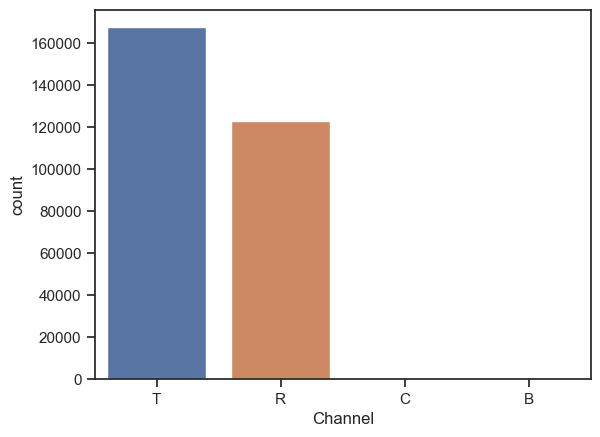

In [481]:
sns.countplot(data=data, x="Channel")

In [482]:
data["PPM"].unique()

array(['N', 'X', 'Y'], dtype=object)

<AxesSubplot:xlabel='PPM', ylabel='count'>

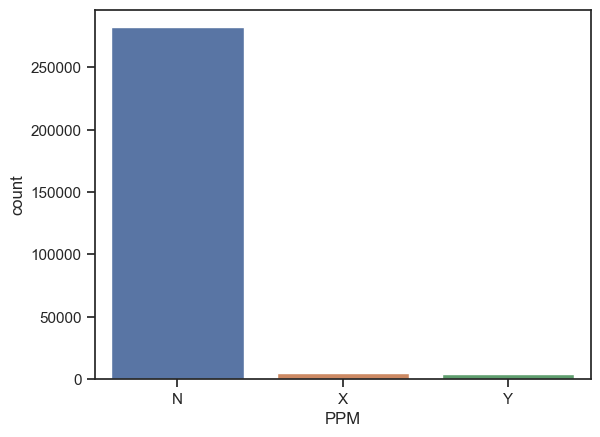

In [483]:
sns.countplot(data = data, x = 'PPM')

In [484]:
data["PropertyState"].unique()

array(['IL', 'CO', 'KS', 'CA', 'NJ', 'WI', 'FL', 'CT', 'GA', 'TX', 'MD',
       'MA', 'SC', 'WY', 'NC', 'AZ', 'IN', 'MS', 'NY', 'WA', 'AR', 'VA',
       'MN', 'LA', 'PA', 'OR', 'RI', 'UT', 'MI', 'TN', 'AL', 'MO', 'IA',
       'NM', 'NV', 'VT', 'OH', 'NE', 'HI', 'ID', 'PR', 'DC', 'GU', 'KY',
       'NH', 'SD', 'ME', 'MT', 'OK', 'WV', 'DE', 'ND', 'AK'], dtype=object)

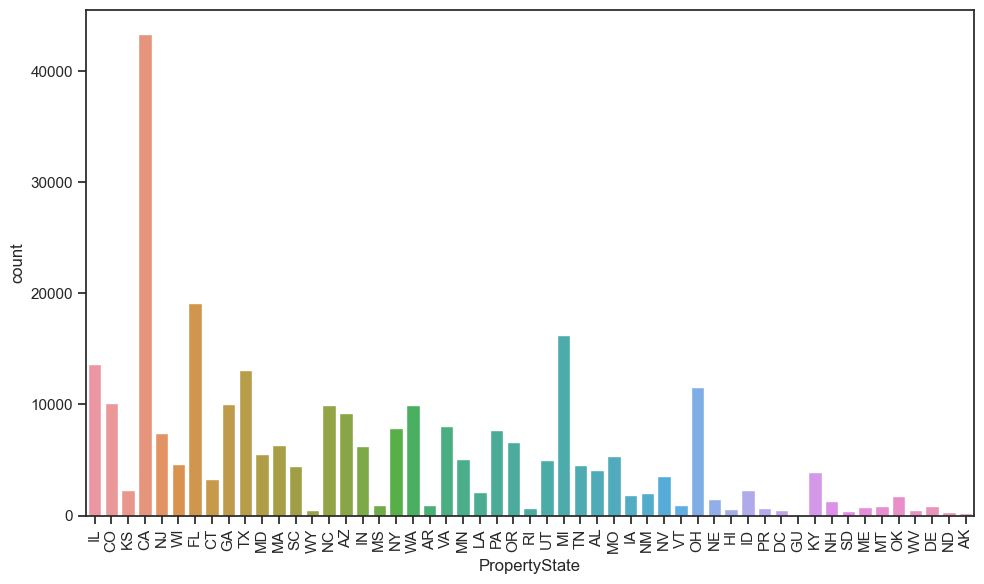

In [485]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='PropertyState')
plt.xticks(rotation=90) 
plt.tight_layout()  
plt.show()
# There are highest loans from california

In [486]:
data["PropertyType"].unique()

array(['SF', 'PU', 'CO', 'MH', 'CP', 'LH', 'X '], dtype=object)

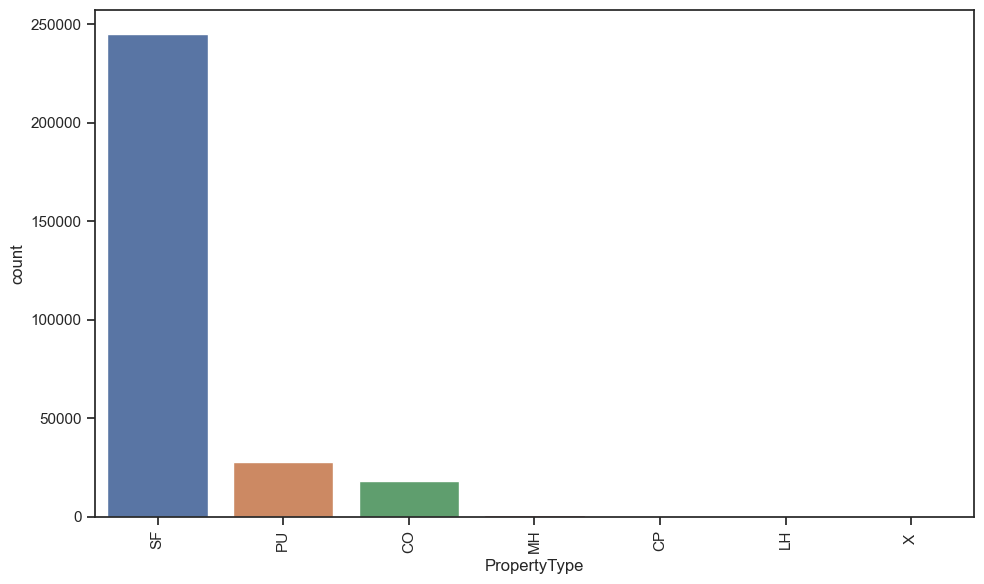

In [487]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='PropertyType')
plt.xticks(rotation=90) 
plt.tight_layout()  
plt.show()
#Single family homes are dominant

In [488]:

data["LoanPurpose"].unique()

array(['P', 'N', 'C'], dtype=object)

<AxesSubplot:xlabel='LoanPurpose', ylabel='count'>

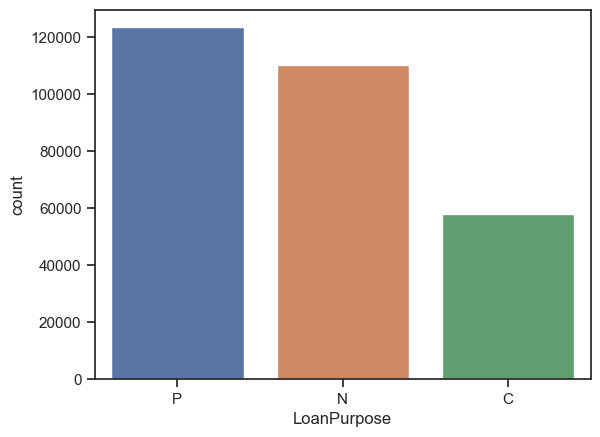

In [489]:
sns.countplot(data=data, x='LoanPurpose')
# Purchase loans are dominant compared to Refinance Loan and cash out Refinance Loan

In [490]:
data["NumBorrowers"].unique()

array(['2', '1', 'X '], dtype=object)

<AxesSubplot:xlabel='NumBorrowers', ylabel='count'>

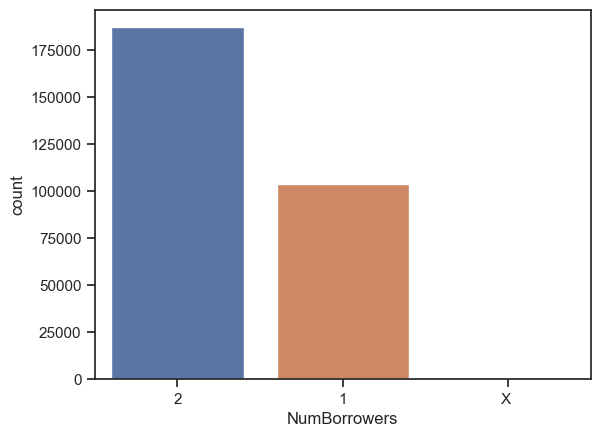

In [491]:
sns.countplot(data=data, x='NumBorrowers')
# The loans associated with 2 borrowers are higher in number 

In [492]:
data["EverDelinquent"].unique()

array([0, 1], dtype=int64)

<AxesSubplot:xlabel='EverDelinquent', ylabel='count'>

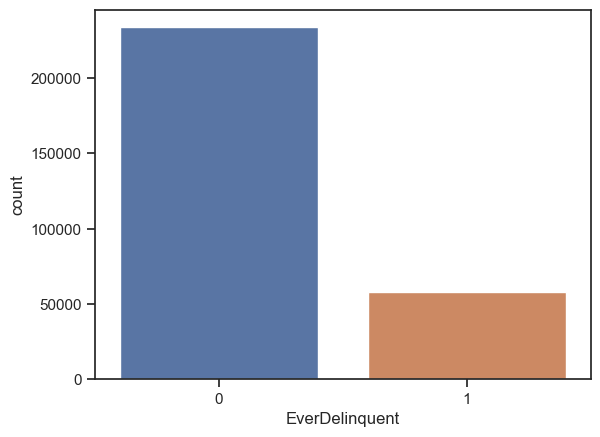

In [493]:
sns.countplot(data=data, x="EverDelinquent")
# Higher proportion of 0's indicate lower credit risk

In [494]:
data.set_index("LoanSeqNum",inplace=True)
data.head()

CreditScore FirstPaymentDate FirstTimeHomebuyer MaturityDate  \
LoanSeqNum                                                                   
F199Q1268030            0          1999-02                  N      2029-01   
F199Q1015092            0          1999-02                  N      2029-01   
F199Q1266886            0          1999-02                  N      2029-01   
F199Q1178167            0          1999-02                  N      2029-01   
F199Q1178517            0          1999-02                  N      2029-01   

                MSA  MIP  Units Occupancy  OCLTV  DTI  ...  PropertyType  \
LoanSeqNum                                             ...                 
F199Q1268030  16974   25      1         O     89   27  ...            SF   
F199Q1015092  19740    0      1         O     73   17  ...            SF   
F199Q1266886  29940    0      1         O     75   16  ...            SF   
F199Q1178167  31084    0      1         O     76   14  ...            SF   
F199Q1178517  35644    0      1         O     78   18  ...            SF   

              PostalCode  LoanPurpose OrigLoanTerm NumBorrowers SellerName  \
LoanSeqNum                                                                   
F199Q1268030       60400            P          360            2         FL   
F199Q1015092       80200            N          360            1         FT   
F199Q1266886       66000            N          360            2         FL   
F199Q1178167       90700            N          360            2         GM   
F199Q1178517        7600            N          360            2         GM   

                      ServicerName EverDelinquent MonthsDelinquent  \
LoanSeqNum                                                           
F199Q1268030  WASHINGTONMUTUALBANK              0                0   
F199Q1015092  CHASEHOMEFINANCELLC               0                0   
F199Q1266886  WASHINGTONMUTUALBANK              0                0   
F199Q1178167  GMACMTGECORP                      0                0   
F199Q1178517  GMACMTGECORP                      0                0   

             MonthsInRepayment  
LoanSeqNum                      
F199Q1268030                52  
F199Q1015092               144  
F199Q1266886                67  
F199Q1178167                35  
F199Q1178517                54  

[5 rows x 27 columns]

# Data Encoding

In [495]:
data.dtypes

CreditScore               int64
FirstPaymentDate      period[M]
FirstTimeHomebuyer       object
MaturityDate          period[M]
MSA                      object
MIP                       int64
Units                     int64
Occupancy                object
OCLTV                     int64
DTI                       int64
OrigUPB                   int64
LTV                       int64
OrigInterestRate        float64
Channel                  object
PPM                      object
ProductType              object
PropertyState            object
PropertyType             object
PostalCode               object
LoanPurpose              object
OrigLoanTerm              int64
NumBorrowers             object
SellerName               object
ServicerName             object
EverDelinquent            int64
MonthsDelinquent          int64
MonthsInRepayment         int64
dtype: object

In [496]:
# # Total 10 of categorical variables
# FirstTimeHomebuyer --> Ordinal
# MSA --> Ordinal
# Occupancy --> Ordinal
# Channel  --> Nominal              
# PPM      --> Nominal                                      
# PropertyType --> Nominal         
# PostalCode   --> Ordinal           
# LoanPurpose  --> Ordinal            
# SellerName --> Ordinal              
# ServicerName --> Ordinal
# Label Encosing for all Ordinal data and one hot encoding for all nominal data

In [497]:
encoded_data = data.copy()

In [498]:
encoded_data.head()

CreditScore FirstPaymentDate FirstTimeHomebuyer MaturityDate  \
LoanSeqNum                                                                   
F199Q1268030            0          1999-02                  N      2029-01   
F199Q1015092            0          1999-02                  N      2029-01   
F199Q1266886            0          1999-02                  N      2029-01   
F199Q1178167            0          1999-02                  N      2029-01   
F199Q1178517            0          1999-02                  N      2029-01   

                MSA  MIP  Units Occupancy  OCLTV  DTI  ...  PropertyType  \
LoanSeqNum                                             ...                 
F199Q1268030  16974   25      1         O     89   27  ...            SF   
F199Q1015092  19740    0      1         O     73   17  ...            SF   
F199Q1266886  29940    0      1         O     75   16  ...            SF   
F199Q1178167  31084    0      1         O     76   14  ...            SF   
F199Q1178517  35644    0      1         O     78   18  ...            SF   

              PostalCode  LoanPurpose OrigLoanTerm NumBorrowers SellerName  \
LoanSeqNum                                                                   
F199Q1268030       60400            P          360            2         FL   
F199Q1015092       80200            N          360            1         FT   
F199Q1266886       66000            N          360            2         FL   
F199Q1178167       90700            N          360            2         GM   
F199Q1178517        7600            N          360            2         GM   

                      ServicerName EverDelinquent MonthsDelinquent  \
LoanSeqNum                                                           
F199Q1268030  WASHINGTONMUTUALBANK              0                0   
F199Q1015092  CHASEHOMEFINANCELLC               0                0   
F199Q1266886  WASHINGTONMUTUALBANK              0                0   
F199Q1178167  GMACMTGECORP                      0                0   
F199Q1178517  GMACMTGECORP                      0                0   

             MonthsInRepayment  
LoanSeqNum                      
F199Q1268030                52  
F199Q1015092               144  
F199Q1266886                67  
F199Q1178167                35  
F199Q1178517                54  

[5 rows x 27 columns]

In [499]:
label_encoder = LabelEncoder()
encoded_data["Occupancy"] = label_encoder.fit_transform(encoded_data["Occupancy"])
encoded_data.head()

CreditScore FirstPaymentDate FirstTimeHomebuyer MaturityDate  \
LoanSeqNum                                                                   
F199Q1268030            0          1999-02                  N      2029-01   
F199Q1015092            0          1999-02                  N      2029-01   
F199Q1266886            0          1999-02                  N      2029-01   
F199Q1178167            0          1999-02                  N      2029-01   
F199Q1178517            0          1999-02                  N      2029-01   

                MSA  MIP  Units  Occupancy  OCLTV  DTI  ...  PropertyType  \
LoanSeqNum                                              ...                 
F199Q1268030  16974   25      1          1     89   27  ...            SF   
F199Q1015092  19740    0      1          1     73   17  ...            SF   
F199Q1266886  29940    0      1          1     75   16  ...            SF   
F199Q1178167  31084    0      1          1     76   14  ...            SF   
F199Q1178517  35644    0      1          1     78   18  ...            SF   

              PostalCode  LoanPurpose OrigLoanTerm NumBorrowers SellerName  \
LoanSeqNum                                                                   
F199Q1268030       60400            P          360            2         FL   
F199Q1015092       80200            N          360            1         FT   
F199Q1266886       66000            N          360            2         FL   
F199Q1178167       90700            N          360            2         GM   
F199Q1178517        7600            N          360            2         GM   

                      ServicerName EverDelinquent MonthsDelinquent  \
LoanSeqNum                                                           
F199Q1268030  WASHINGTONMUTUALBANK              0                0   
F199Q1015092  CHASEHOMEFINANCELLC               0                0   
F199Q1266886  WASHINGTONMUTUALBANK              0                0   
F199Q1178167  GMACMTGECORP                      0                0   
F199Q1178517  GMACMTGECORP                      0                0   

             MonthsInRepayment  
LoanSeqNum                      
F199Q1268030                52  
F199Q1015092               144  
F199Q1266886                67  
F199Q1178167                35  
F199Q1178517                54  

[5 rows x 27 columns]

In [500]:
# List of columns to be label encoded
le = LabelEncoder()
columns_to_encode = ['PostalCode','MSA', 'LoanPurpose', 'SellerName','ServicerName','PropertyState',]

# Apply label encoding to train data
for column in columns_to_encode:
    encoded_data[column] = le.fit_transform(encoded_data[column])

In [501]:
encoded_data.head()

CreditScore FirstPaymentDate FirstTimeHomebuyer MaturityDate  \
LoanSeqNum                                                                   
F199Q1268030            0          1999-02                  N      2029-01   
F199Q1015092            0          1999-02                  N      2029-01   
F199Q1266886            0          1999-02                  N      2029-01   
F199Q1178167            0          1999-02                  N      2029-01   
F199Q1178517            0          1999-02                  N      2029-01   

              MSA  MIP  Units  Occupancy  OCLTV  DTI  ...  PropertyType  \
LoanSeqNum                                            ...                 
F199Q1268030   68   25      1          1     89   27  ...            SF   
F199Q1015092   95    0      1          1     73   17  ...            SF   
F199Q1266886  198    0      1          1     75   16  ...            SF   
F199Q1178167  210    0      1          1     76   14  ...            SF   
F199Q1178517  250    0      1          1     78   18  ...            SF   

              PostalCode  LoanPurpose OrigLoanTerm NumBorrowers SellerName  \
LoanSeqNum                                                                   
F199Q1268030         521            2          360            2          7   
F199Q1015092         718            1          360            1          8   
F199Q1266886         577            1          360            2          7   
F199Q1178167         807            1          360            2         10   
F199Q1178517         672            1          360            2         10   

              ServicerName EverDelinquent  MonthsDelinquent  MonthsInRepayment  
LoanSeqNum                                                                      
F199Q1268030            17              0                 0                 52  
F199Q1015092             3              0                 0                144  
F199Q1266886            17              0                 0                 67  
F199Q1178167            10              0                 0                 35  
F199Q1178517            10              0                 0                 54  

[5 rows x 27 columns]

In [502]:
encoded_data.columns

Index(['CreditScore', 'FirstPaymentDate', 'FirstTimeHomebuyer', 'MaturityDate',
       'MSA', 'MIP', 'Units', 'Occupancy', 'OCLTV', 'DTI', 'OrigUPB', 'LTV',
       'OrigInterestRate', 'Channel', 'PPM', 'ProductType', 'PropertyState',
       'PropertyType', 'PostalCode', 'LoanPurpose', 'OrigLoanTerm',
       'NumBorrowers', 'SellerName', 'ServicerName', 'EverDelinquent',
       'MonthsDelinquent', 'MonthsInRepayment'],
      dtype='object')

In [503]:
# Onehot encoding
Final_encoded_data = pd.get_dummies(encoded_data, columns=['Channel', 'PPM', 'PropertyType'])

In [504]:
Final_encoded_data.head()

CreditScore FirstPaymentDate FirstTimeHomebuyer MaturityDate  \
LoanSeqNum                                                                   
F199Q1268030            0          1999-02                  N      2029-01   
F199Q1015092            0          1999-02                  N      2029-01   
F199Q1266886            0          1999-02                  N      2029-01   
F199Q1178167            0          1999-02                  N      2029-01   
F199Q1178517            0          1999-02                  N      2029-01   

              MSA  MIP  Units  Occupancy  OCLTV  DTI  ...  PPM_N  PPM_X  \
LoanSeqNum                                            ...                 
F199Q1268030   68   25      1          1     89   27  ...      1      0   
F199Q1015092   95    0      1          1     73   17  ...      1      0   
F199Q1266886  198    0      1          1     75   16  ...      1      0   
F199Q1178167  210    0      1          1     76   14  ...      1      0   
F199Q1178517  250    0      1          1     78   18  ...      1      0   

              PPM_Y PropertyType_CO  PropertyType_CP  PropertyType_LH  \
LoanSeqNum                                                              
F199Q1268030      0               0                0                0   
F199Q1015092      0               0                0                0   
F199Q1266886      0               0                0                0   
F199Q1178167      0               0                0                0   
F199Q1178517      0               0                0                0   

              PropertyType_MH  PropertyType_PU PropertyType_SF  \
LoanSeqNum                                                       
F199Q1268030                0                0               1   
F199Q1015092                0                0               1   
F199Q1266886                0                0               1   
F199Q1178167                0                0               1   
F199Q1178517                0                0               1   

              PropertyType_X   
LoanSeqNum                     
F199Q1268030                0  
F199Q1015092                0  
F199Q1266886                0  
F199Q1178167                0  
F199Q1178517                0  

[5 rows x 38 columns]

In [505]:
Final_encoded_data.drop("ProductType",axis = 1,inplace = True)


In [506]:
Final_encoded_data["NumBorrowers"] = Final_encoded_data["NumBorrowers"].replace("X ", 99)

In [507]:
Final_encoded_data["NumBorrowers"] = Final_encoded_data["NumBorrowers"].astype(int)

In [508]:
Final_encoded_data.dtypes

CreditScore               int64
FirstPaymentDate      period[M]
FirstTimeHomebuyer       object
MaturityDate          period[M]
MSA                       int32
MIP                       int64
Units                     int64
Occupancy                 int32
OCLTV                     int64
DTI                       int64
OrigUPB                   int64
LTV                       int64
OrigInterestRate        float64
PropertyState             int32
PostalCode                int32
LoanPurpose               int32
OrigLoanTerm              int64
NumBorrowers              int32
SellerName                int32
ServicerName              int32
EverDelinquent            int64
MonthsDelinquent          int64
MonthsInRepayment         int64
Channel_B                 uint8
Channel_C                 uint8
Channel_R                 uint8
Channel_T                 uint8
PPM_N                     uint8
PPM_X                     uint8
PPM_Y                     uint8
PropertyType_CO           uint8
Property

In [509]:
data.dtypes

CreditScore               int64
FirstPaymentDate      period[M]
FirstTimeHomebuyer       object
MaturityDate          period[M]
MSA                      object
MIP                       int64
Units                     int64
Occupancy                object
OCLTV                     int64
DTI                       int64
OrigUPB                   int64
LTV                       int64
OrigInterestRate        float64
Channel                  object
PPM                      object
ProductType              object
PropertyState            object
PropertyType             object
PostalCode               object
LoanPurpose              object
OrigLoanTerm              int64
NumBorrowers             object
SellerName               object
ServicerName             object
EverDelinquent            int64
MonthsDelinquent          int64
MonthsInRepayment         int64
dtype: object

# Exploratory Data  Analysis

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


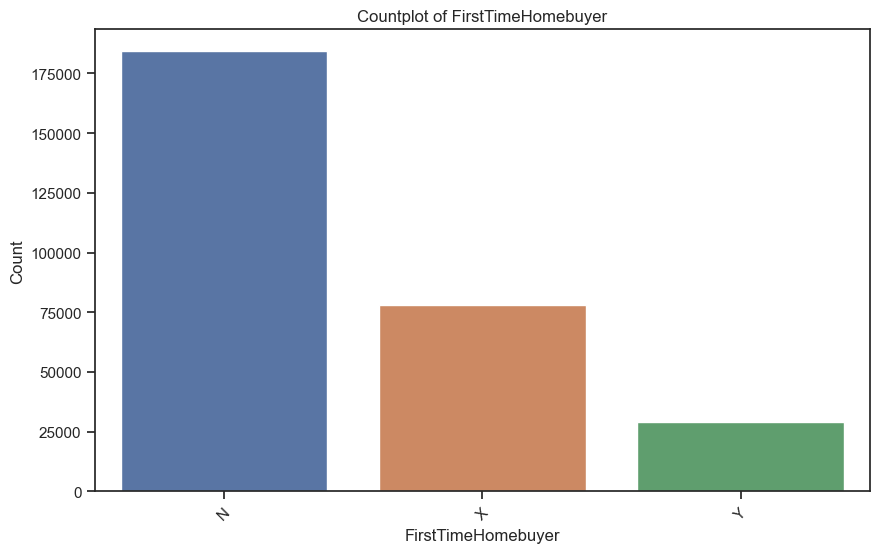

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


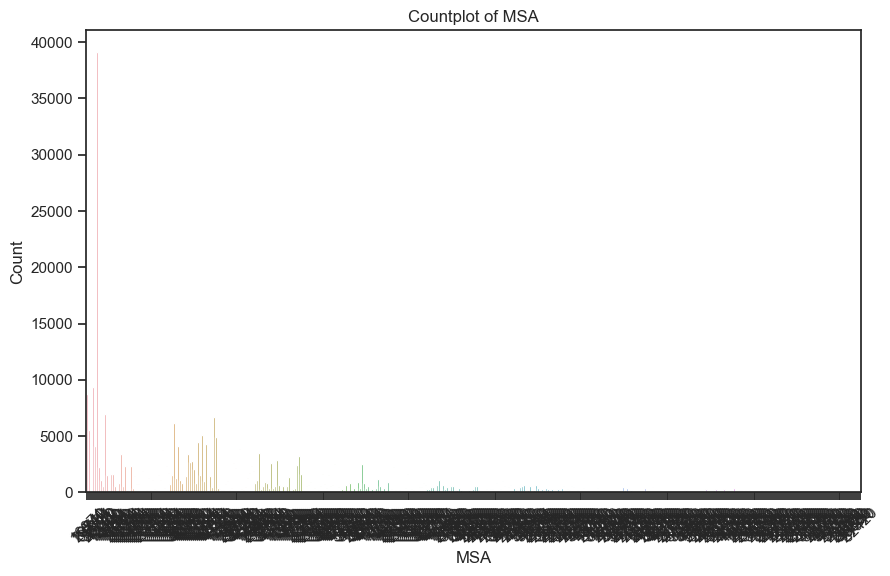

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


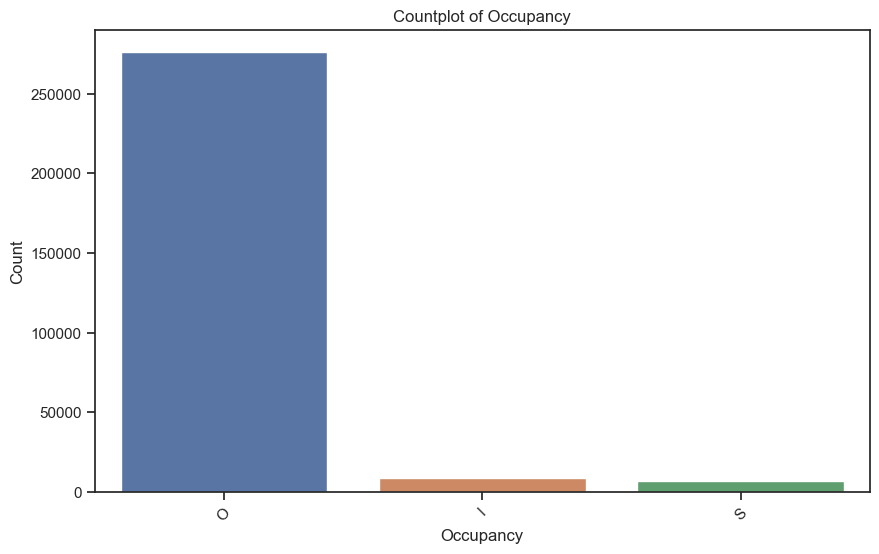

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


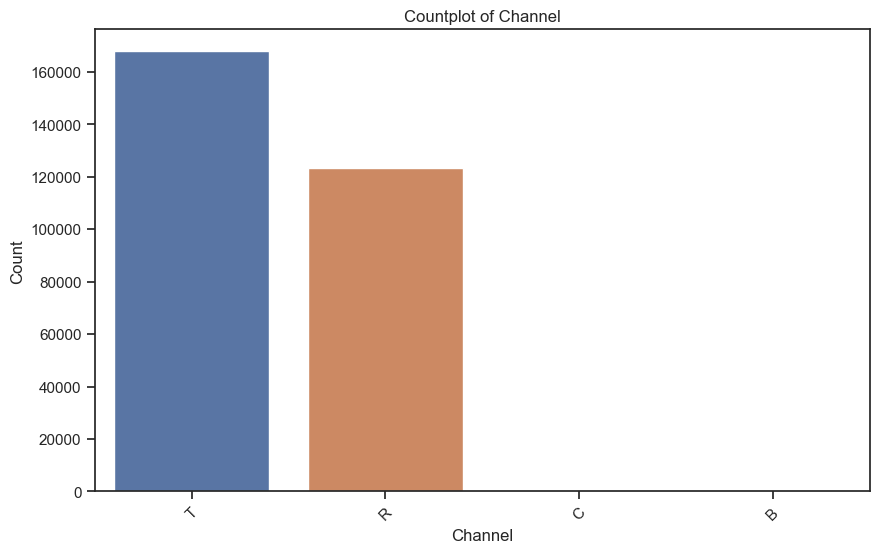

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


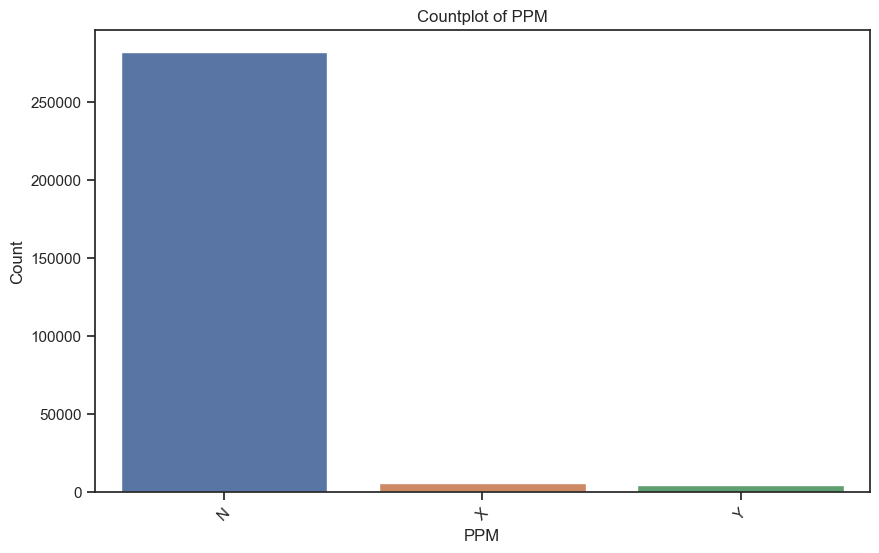

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


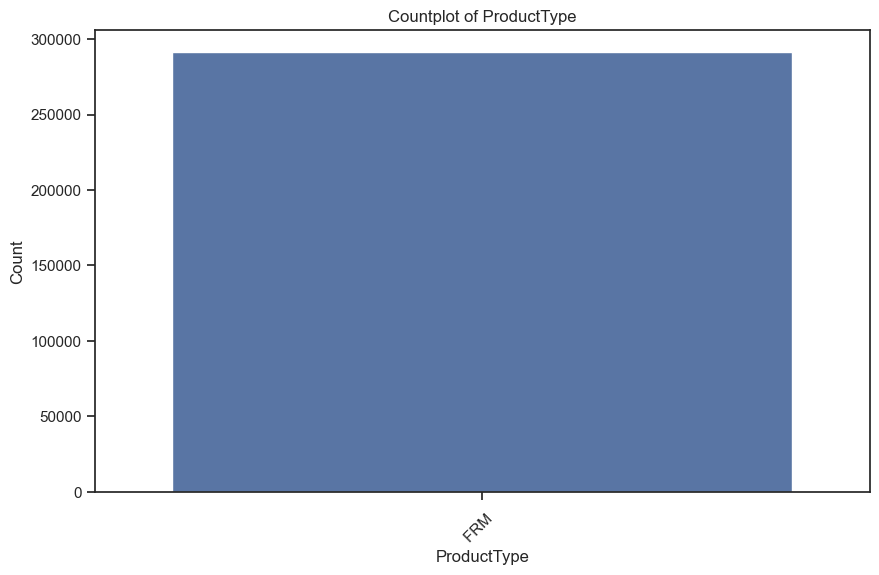

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


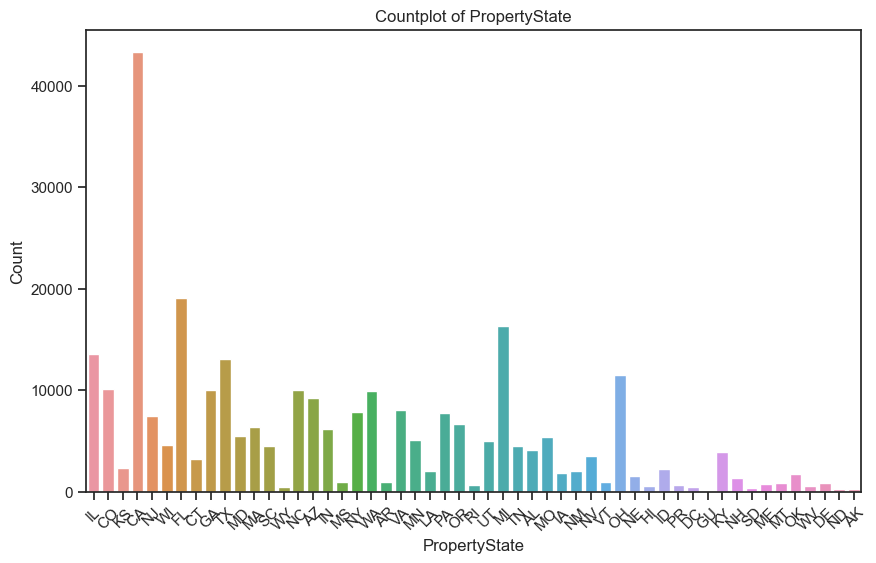

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


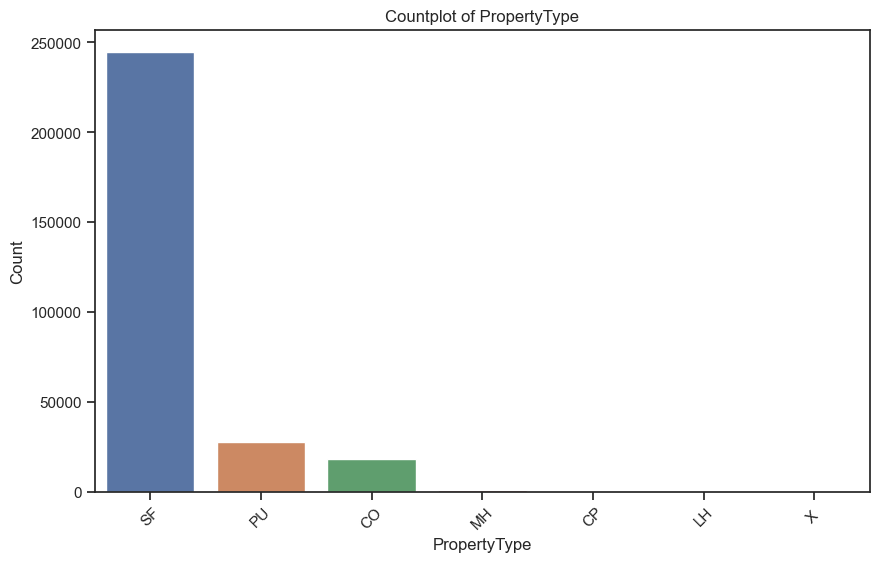

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


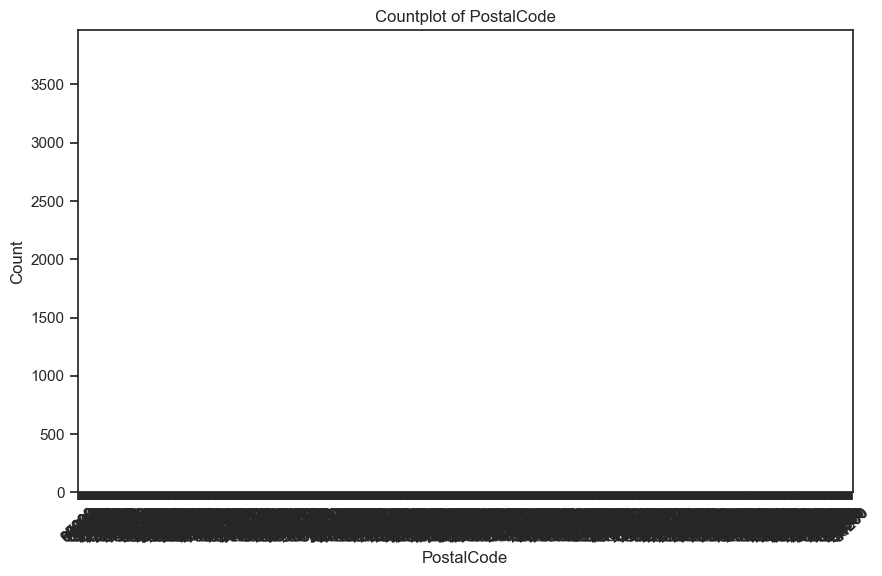

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


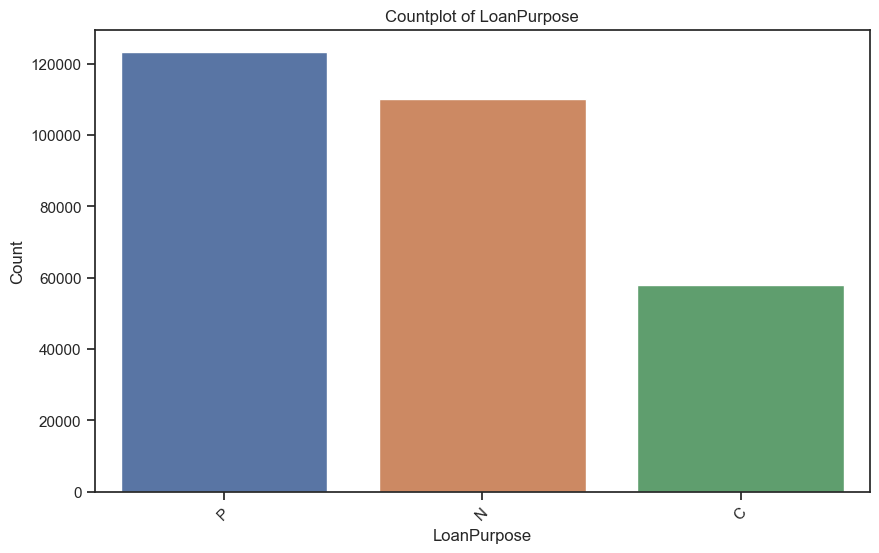

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


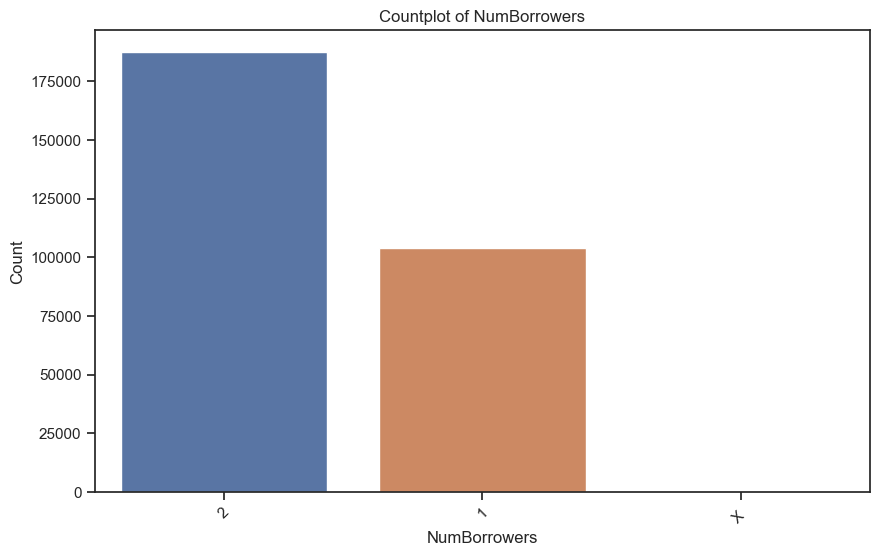

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


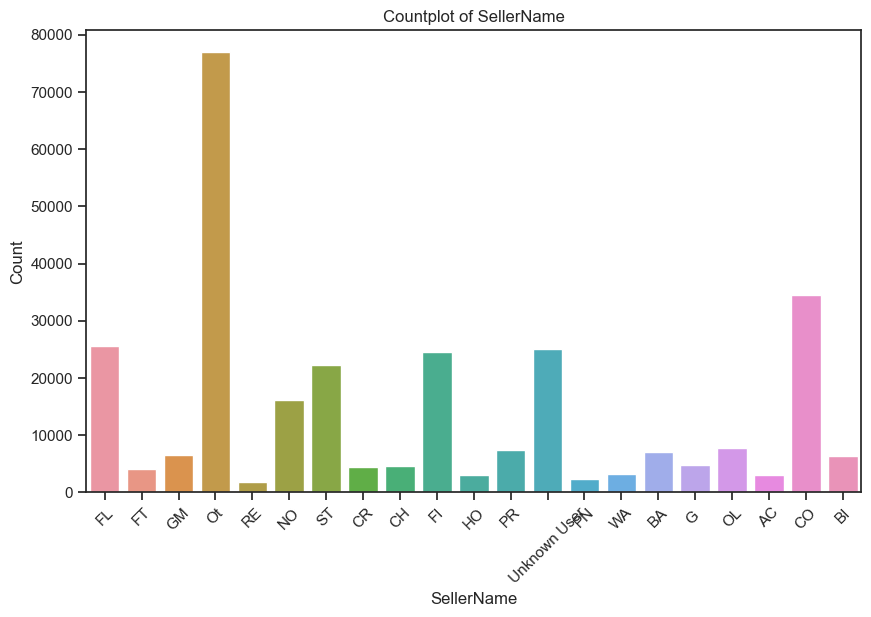

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


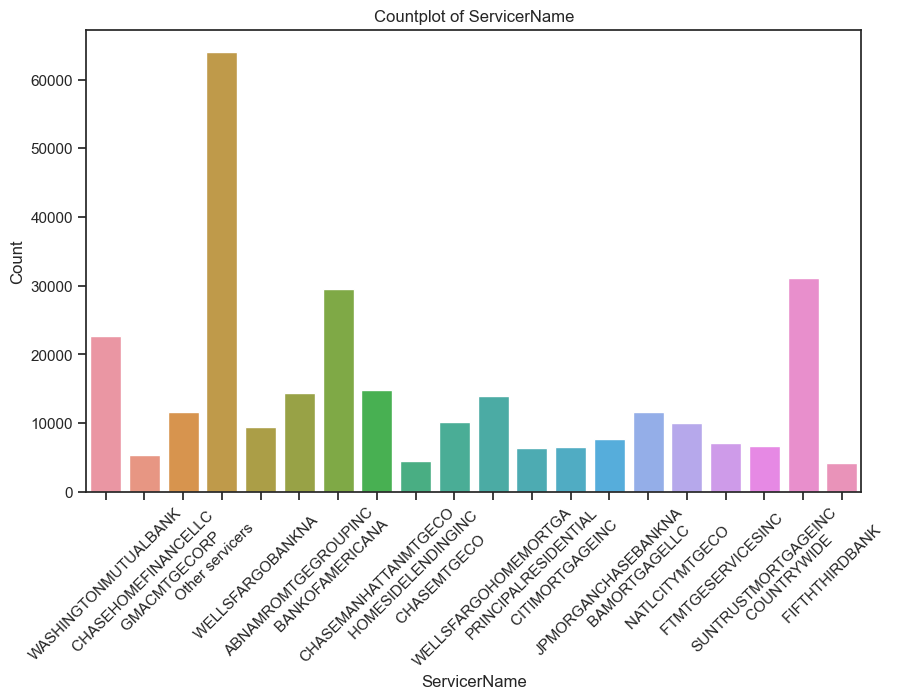

In [510]:
# Histograms for all Numeric columns 
categorical_columns = ['FirstTimeHomebuyer', 'MSA', 'Occupancy', 'Channel', 'PPM', 'ProductType',
                       'PropertyState', 'PropertyType', 'PostalCode', 'LoanPurpose', 'NumBorrowers',
                       'SellerName', 'ServicerName']

for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data[col])
    plt.title(f'Countplot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()


In [511]:
data.columns

Index(['CreditScore', 'FirstPaymentDate', 'FirstTimeHomebuyer', 'MaturityDate',
       'MSA', 'MIP', 'Units', 'Occupancy', 'OCLTV', 'DTI', 'OrigUPB', 'LTV',
       'OrigInterestRate', 'Channel', 'PPM', 'ProductType', 'PropertyState',
       'PropertyType', 'PostalCode', 'LoanPurpose', 'OrigLoanTerm',
       'NumBorrowers', 'SellerName', 'ServicerName', 'EverDelinquent',
       'MonthsDelinquent', 'MonthsInRepayment'],
      dtype='object')

Text(0.5, 0, 'CreditScore')

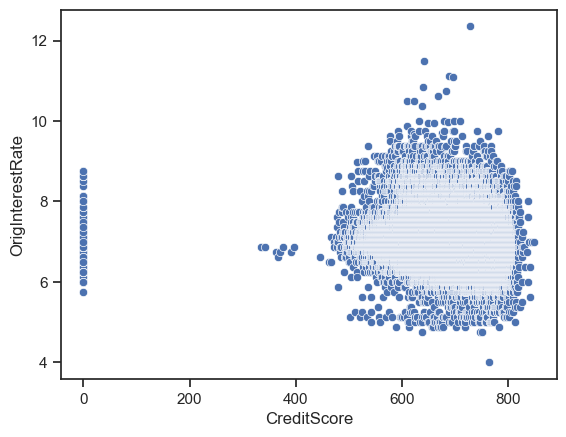

In [512]:
# # Scatter Plot
sns.scatterplot(x='CreditScore', y='OrigInterestRate', data=data)
# plt.title('Scatter Plot - CreditScore vs. OrigInterestRate')
plt.xlabel('CreditScore')
# # plt.ylabel('OrigInterestRate')
# plt.show()


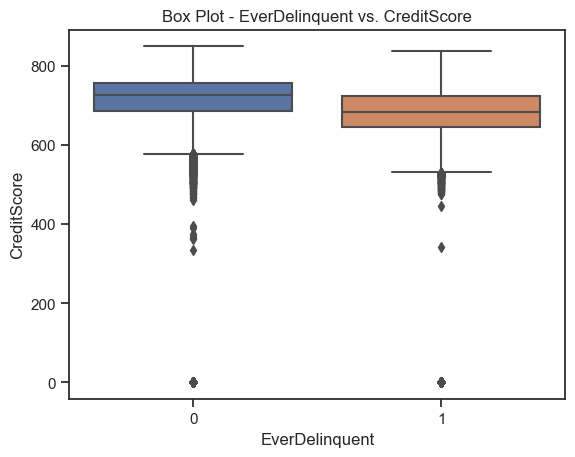

In [513]:
# Bivariate Analysis - Box Plot
sns.boxplot(x='EverDelinquent', y='CreditScore', data=data)
plt.title('Box Plot - EverDelinquent vs. CreditScore')
plt.xlabel('EverDelinquent')
plt.ylabel('CreditScore')
plt.show()

<AxesSubplot:xlabel='EverDelinquent', ylabel='MonthsDelinquent'>

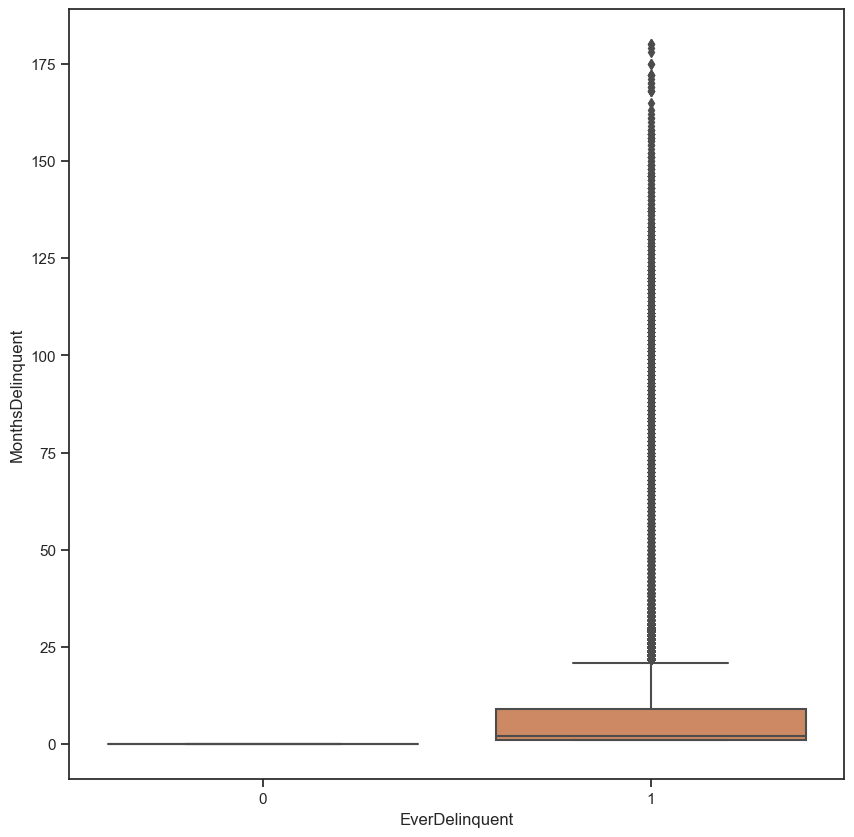

In [514]:
plt.figure(figsize=(10, 10))
sns.boxplot(x='EverDelinquent', y='MonthsDelinquent', data=data)

<AxesSubplot:xlabel='EverDelinquent', ylabel='MonthsInRepayment'>

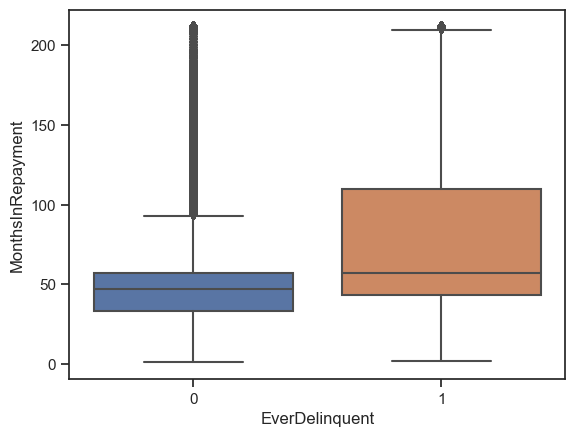

In [515]:
sns.boxplot(x='EverDelinquent', y='MonthsInRepayment', data=data)

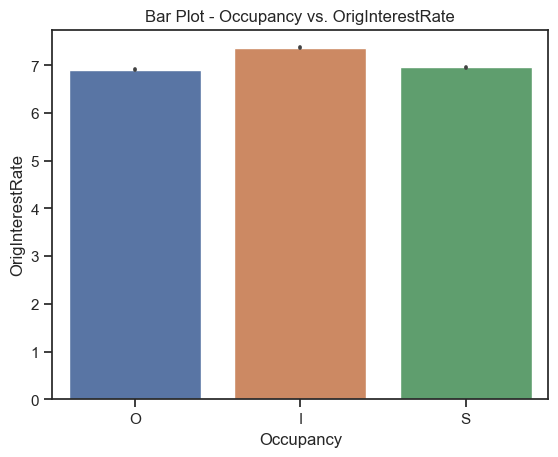

In [516]:
# Bivariate Analysis - Bar Plot
sns.barplot(x='Occupancy', y='OrigInterestRate', data=data)
plt.title('Bar Plot - Occupancy vs. OrigInterestRate')
plt.xlabel('Occupancy')
plt.ylabel('OrigInterestRate')
plt.show()

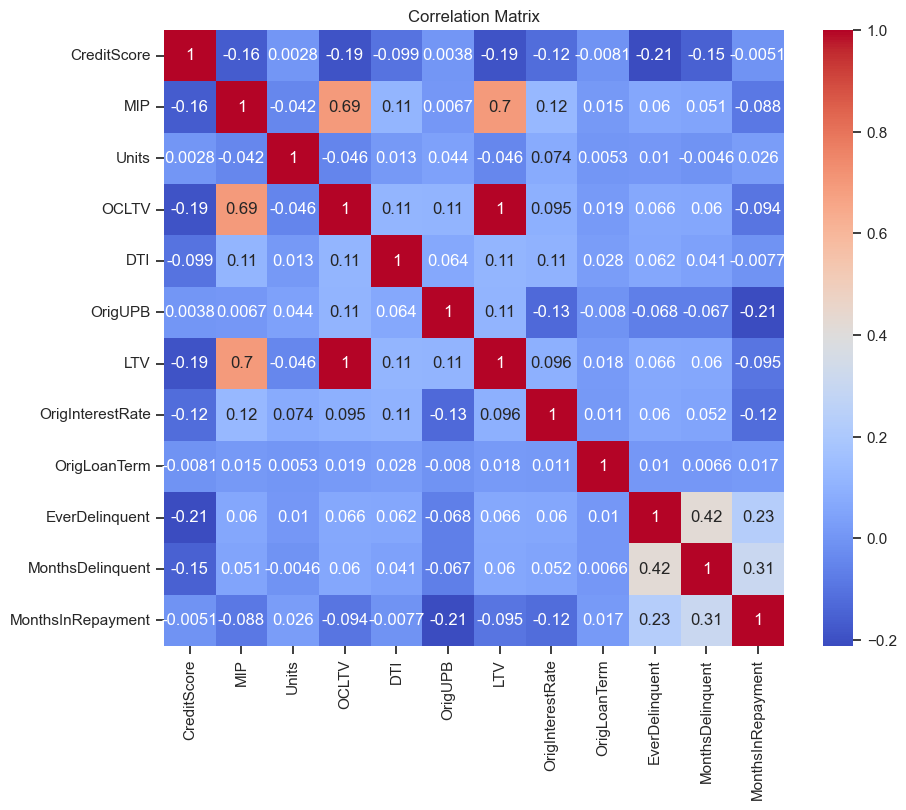

In [517]:
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

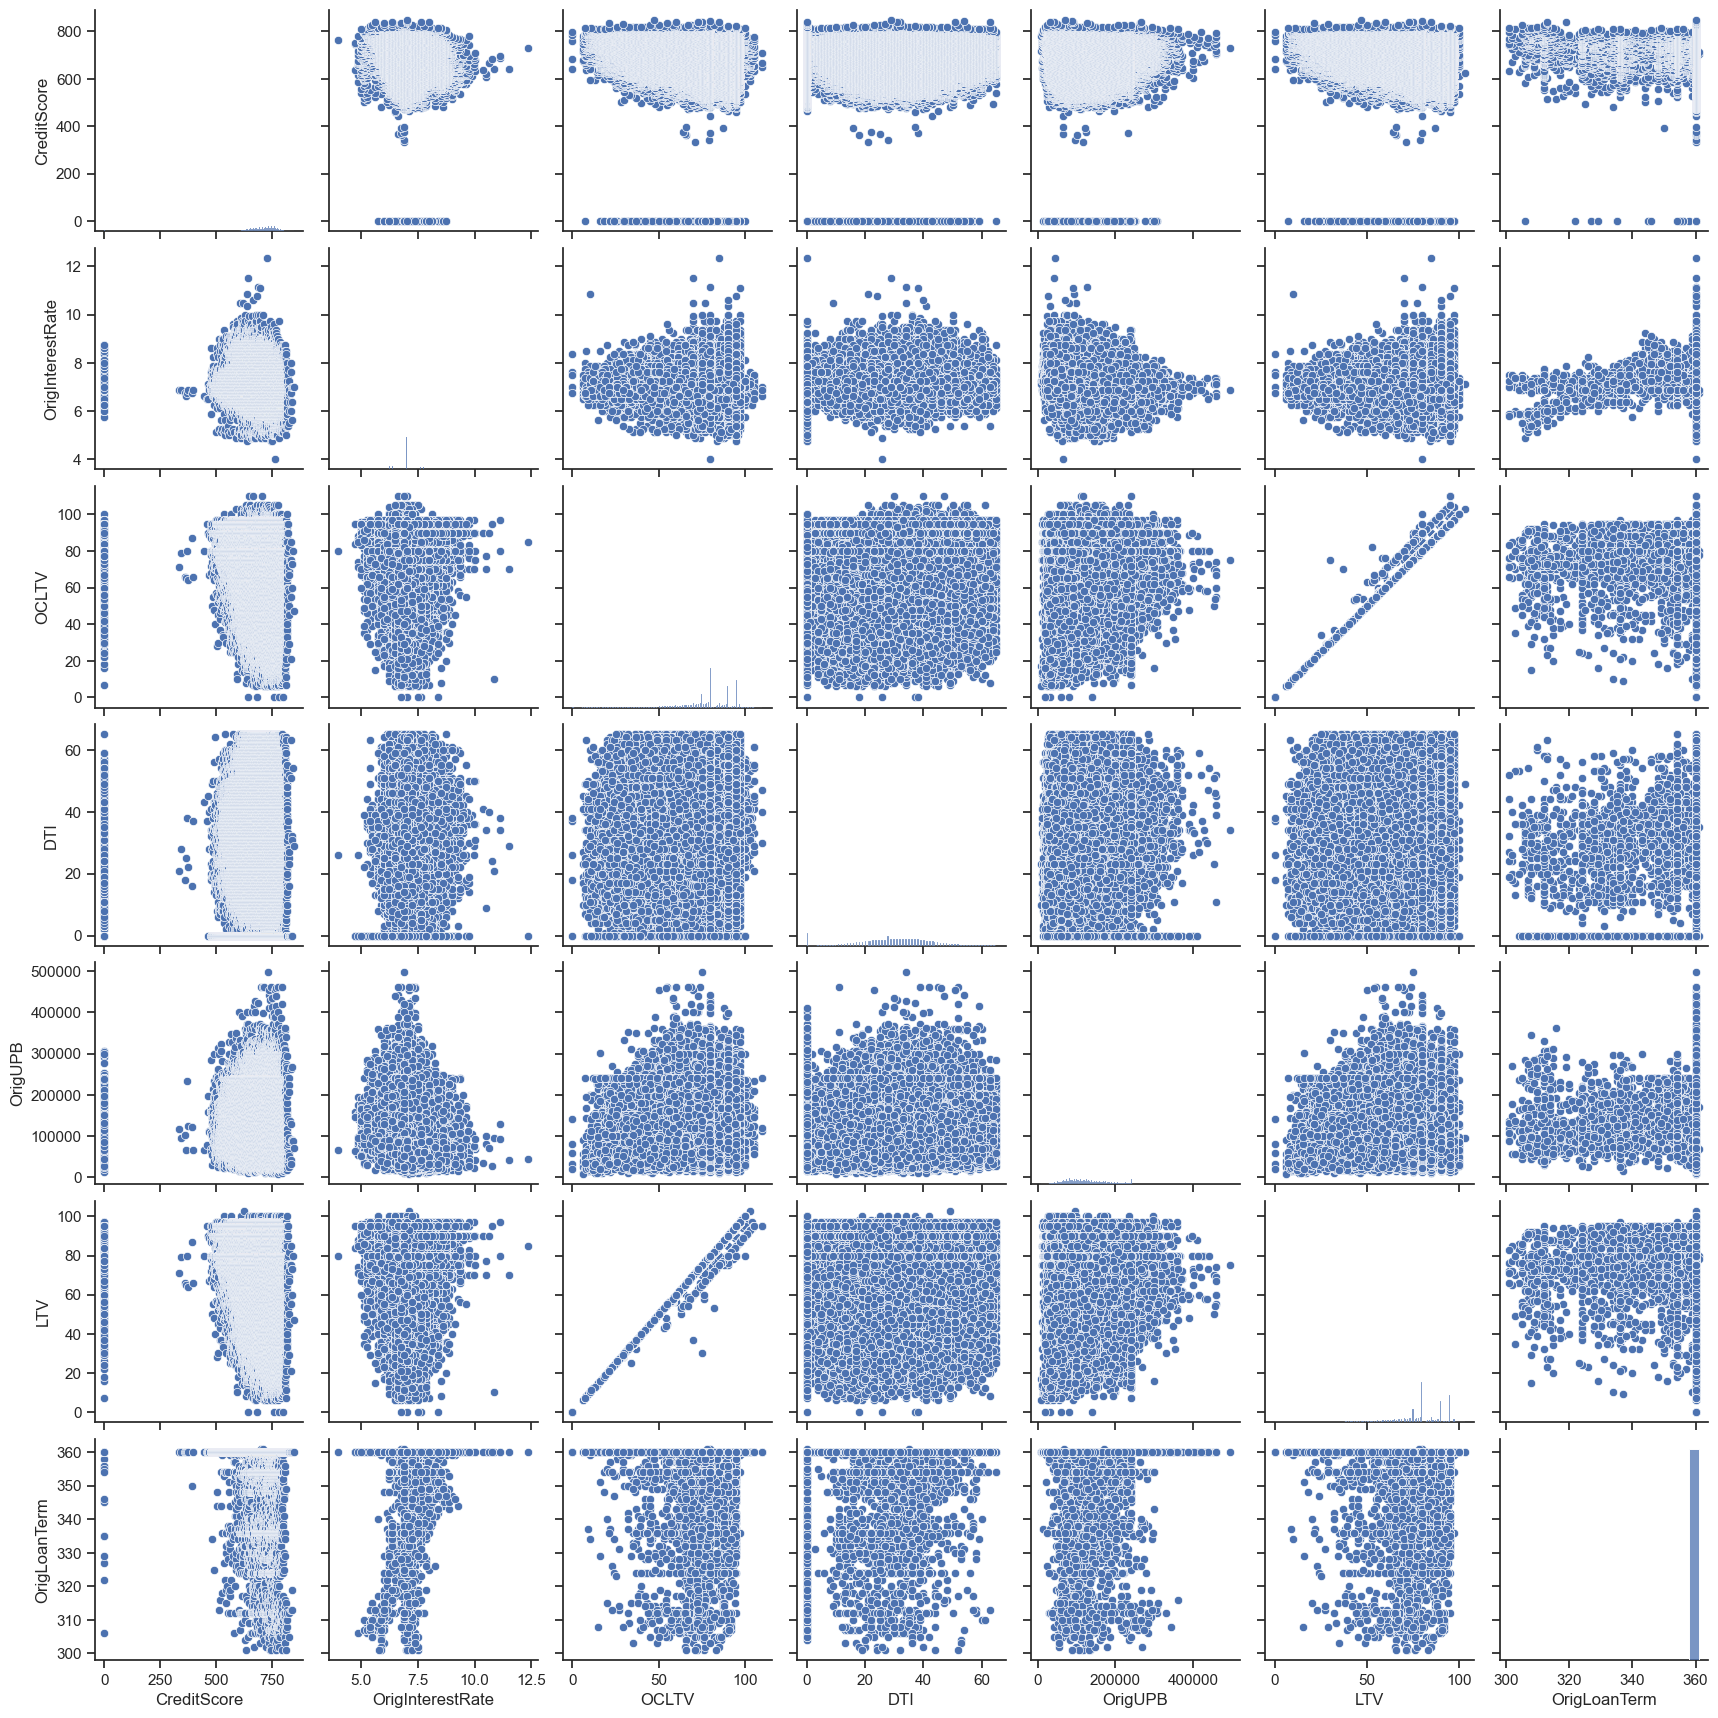

In [518]:
numeric_columns = ['CreditScore', 'OrigInterestRate', 'OCLTV', 'DTI', 'OrigUPB', 'LTV', 'OrigLoanTerm']
sns.set(style="ticks")
sns.pairplot(data[numeric_columns])
plt.show()

In [519]:
# transform discrete column to categoricsl -->specific cs score range poor, fair,good,excellent --> create with ranges
# Finanace doesnot work on discrete data (CSV)
# LTV(Low,med,high) must be of 3 ranges , FTHB (Firsttimehome buyer) contains 3 values X CONVERT THIS x To numerical and then u can drop it.
# MONTHSINREPAYMENT --> Also contains discrete variables, (total num of emi's in single loan) p-p --> if this has some 20years of time means it contains 240 emi's, in this can we make some range .create 5 labels in form of yearly basis (0--4,4--8,8--12,12--16,16--20)
#                                                          you can drop those columns after creating there transformations

In [520]:
Final_encoded_data.dtypes

CreditScore               int64
FirstPaymentDate      period[M]
FirstTimeHomebuyer       object
MaturityDate          period[M]
MSA                       int32
MIP                       int64
Units                     int64
Occupancy                 int32
OCLTV                     int64
DTI                       int64
OrigUPB                   int64
LTV                       int64
OrigInterestRate        float64
PropertyState             int32
PostalCode                int32
LoanPurpose               int32
OrigLoanTerm              int64
NumBorrowers              int32
SellerName                int32
ServicerName              int32
EverDelinquent            int64
MonthsDelinquent          int64
MonthsInRepayment         int64
Channel_B                 uint8
Channel_C                 uint8
Channel_R                 uint8
Channel_T                 uint8
PPM_N                     uint8
PPM_X                     uint8
PPM_Y                     uint8
PropertyType_CO           uint8
Property

In [521]:
Final_encoded_data.head()

CreditScore FirstPaymentDate FirstTimeHomebuyer MaturityDate  \
LoanSeqNum                                                                   
F199Q1268030            0          1999-02                  N      2029-01   
F199Q1015092            0          1999-02                  N      2029-01   
F199Q1266886            0          1999-02                  N      2029-01   
F199Q1178167            0          1999-02                  N      2029-01   
F199Q1178517            0          1999-02                  N      2029-01   

              MSA  MIP  Units  Occupancy  OCLTV  DTI  ...  PPM_N  PPM_X  \
LoanSeqNum                                            ...                 
F199Q1268030   68   25      1          1     89   27  ...      1      0   
F199Q1015092   95    0      1          1     73   17  ...      1      0   
F199Q1266886  198    0      1          1     75   16  ...      1      0   
F199Q1178167  210    0      1          1     76   14  ...      1      0   
F199Q1178517  250    0      1          1     78   18  ...      1      0   

              PPM_Y  PropertyType_CO  PropertyType_CP  PropertyType_LH  \
LoanSeqNum                                                               
F199Q1268030      0                0                0                0   
F199Q1015092      0                0                0                0   
F199Q1266886      0                0                0                0   
F199Q1178167      0                0                0                0   
F199Q1178517      0                0                0                0   

              PropertyType_MH  PropertyType_PU  PropertyType_SF  \
LoanSeqNum                                                        
F199Q1268030                0                0                1   
F199Q1015092                0                0                1   
F199Q1266886                0                0                1   
F199Q1178167                0                0                1   
F199Q1178517                0                0                1   

              PropertyType_X   
LoanSeqNum                     
F199Q1268030                0  
F199Q1015092                0  
F199Q1266886                0  
F199Q1178167                0  
F199Q1178517                0  

[5 rows x 37 columns]

In [522]:
data.head()

CreditScore FirstPaymentDate FirstTimeHomebuyer MaturityDate  \
LoanSeqNum                                                                   
F199Q1268030            0          1999-02                  N      2029-01   
F199Q1015092            0          1999-02                  N      2029-01   
F199Q1266886            0          1999-02                  N      2029-01   
F199Q1178167            0          1999-02                  N      2029-01   
F199Q1178517            0          1999-02                  N      2029-01   

                MSA  MIP  Units Occupancy  OCLTV  DTI  ...  PropertyType  \
LoanSeqNum                                             ...                 
F199Q1268030  16974   25      1         O     89   27  ...            SF   
F199Q1015092  19740    0      1         O     73   17  ...            SF   
F199Q1266886  29940    0      1         O     75   16  ...            SF   
F199Q1178167  31084    0      1         O     76   14  ...            SF   
F199Q1178517  35644    0      1         O     78   18  ...            SF   

              PostalCode  LoanPurpose OrigLoanTerm NumBorrowers SellerName  \
LoanSeqNum                                                                   
F199Q1268030       60400            P          360            2         FL   
F199Q1015092       80200            N          360            1         FT   
F199Q1266886       66000            N          360            2         FL   
F199Q1178167       90700            N          360            2         GM   
F199Q1178517        7600            N          360            2         GM   

                      ServicerName EverDelinquent MonthsDelinquent  \
LoanSeqNum                                                           
F199Q1268030  WASHINGTONMUTUALBANK              0                0   
F199Q1015092  CHASEHOMEFINANCELLC               0                0   
F199Q1266886  WASHINGTONMUTUALBANK              0                0   
F199Q1178167  GMACMTGECORP                      0                0   
F199Q1178517  GMACMTGECORP                      0                0   

             MonthsInRepayment  
LoanSeqNum                      
F199Q1268030                52  
F199Q1015092               144  
F199Q1266886                67  
F199Q1178167                35  
F199Q1178517                54  

[5 rows x 27 columns]

In [523]:
data['CreditScore'].value_counts

<bound method IndexOpsMixin.value_counts of LoanSeqNum
F199Q1268030      0
F199Q1015092      0
F199Q1266886      0
F199Q1178167      0
F199Q1178517      0
               ... 
F199Q1220925    839
F199Q1401332    840
F199Q1401282    840
F199Q1220924    845
F199Q1220923    849
Name: CreditScore, Length: 291451, dtype: int64>

In [524]:
# Credit score to categorical
thresholds = [0, 650, 700, 750, 900]
labels = ["Poor", "Fair", "Good", "Excellent"]
data["NewCreditScore"] = pd.cut(data["CreditScore"], bins=thresholds, labels=labels, right=False)

In [525]:
data.drop("CreditScore", axis=1, inplace=True)

In [526]:
data["NewCreditScore"].unique()

['Poor', 'Fair', 'Good', 'Excellent']
Categories (4, object): ['Poor' < 'Fair' < 'Good' < 'Excellent']

In [527]:
data['LTV'].value_counts()

80     54503
95     37209
90     29343
75     17918
79      7329
       ...  
6          9
98         6
0          5
103        1
99         1
Name: LTV, Length: 97, dtype: int64

In [528]:
thresholds = [
    (data["LTV"] >= 1) & (data["LTV"] < 60),     # Low LTV
    (data["LTV"] >= 60) & (data["LTV"] < 80),    # Medium LTV
    (data["LTV"] >= 80) | (data["LTV"]==0)       # High LTV
]
labels = ["Low LTV", "Moderate LTV", "High LTV"]
data["LTV Group"] = pd.Categorical(pd.np.select(thresholds, labels, default="Unknown"), categories=labels)


C:\Users\Dell\AppData\Local\Temp\ipykernel_22136\3897522209.py:7: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  data["LTV Group"] = pd.Categorical(pd.np.select(thresholds, labels, default="Unknown"), categories=labels)


In [529]:
data.drop("LTV", axis=1, inplace=True)

In [530]:
data['LTV Group'].value_counts()

High LTV        158323
Moderate LTV     95921
Low LTV          37207
Name: LTV Group, dtype: int64

In [531]:
data['LTV Group'].unique()

['High LTV', 'Moderate LTV', 'Low LTV']
Categories (3, object): ['Low LTV', 'Moderate LTV', 'High LTV']

In [532]:
data["FirstTimeHomebuyer"].unique()

array(['N', 'X', 'Y'], dtype=object)

In [533]:
data["MonthsInRepayment"].value_counts()

50     8002
49     7976
52     7947
51     7753
53     7603
       ... 
207     112
200     111
205     107
203     100
204      99
Name: MonthsInRepayment, Length: 212, dtype: int64

In [534]:
data["MonthsInRepayment"].unique()

array([ 52, 144,  67,  35,  54,  42,  44, 145,  64, 212,  37,  47,  53,
        55,  66,  26,  38,  36,  39,  40,  11, 176,  46, 197, 210,  56,
       118,  63,  24,  28,  91,  50,  22, 211, 199,  23,  30, 125,  41,
        76,  49,  18,  19,  43,  60,  83,  95,  29,  45,  13,   6,  48,
        62,  14,  15, 111,  51,  17,  75,  58,  27,  10,  31, 133, 165,
       156,  33,  68, 205,  57, 159,  81, 191, 194, 114,  59, 100, 134,
        74,   9,  34,  77, 170, 122,  69,  72, 206, 148, 153, 101, 180,
         8,  32,   5, 207,   7, 128,  71,  65,  79, 174, 195, 151, 149,
        21,  12, 137, 130,  70, 173, 166,  61, 160,  20, 178,   3, 147,
         2, 164, 139, 108,  92, 209, 102,  87,  94,  73, 123,  16, 142,
         1, 172, 109, 141, 175, 103, 168, 155, 177, 158, 138,  25, 110,
        98,  84, 208, 188, 106, 112, 121, 136, 179,   4, 154, 161, 157,
       150,  80, 183,  93, 143, 162, 126,  89, 184,  82, 117, 107, 193,
        85, 124, 192,  78, 169, 104, 131, 140, 163, 182, 132, 13

In [535]:
threshold = [
    (data["MonthsInRepayment"] >= 0) & (data["MonthsInRepayment"] < 48),
    (data["MonthsInRepayment"] >= 48) & (data["MonthsInRepayment"] < 96),
    (data["MonthsInRepayment"] >= 96) & (data["MonthsInRepayment"] < 144),
    (data["MonthsInRepayment"] >= 144) & (data["MonthsInRepayment"] < 192),
    (data["MonthsInRepayment"] >= 192) & (data["MonthsInRepayment"] < 240)
]
labels = ["Quart1", "Quart2", "Quart3", "Quart4", "Quart5"]

data["MonthsInRepayment Group"] = pd.Categorical(pd.np.select(threshold, labels, default=data["MonthsInRepayment"]))


C:\Users\Dell\AppData\Local\Temp\ipykernel_22136\2654710780.py:10: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  data["MonthsInRepayment Group"] = pd.Categorical(pd.np.select(threshold, labels, default=data["MonthsInRepayment"]))


In [536]:
# Drop the old 'MonthsInRepayment' column
data.drop("MonthsInRepayment", axis=1, inplace=True)


In [537]:
data["MonthsInRepayment Group"].value_counts()

Quart1    141480
Quart2    105332
Quart3     19945
Quart4     12805
Quart5     11889
Name: MonthsInRepayment Group, dtype: int64

In [538]:
data["MonthsInRepayment Group"].unique()

['Quart2', 'Quart4', 'Quart1', 'Quart5', 'Quart3']
Categories (5, object): ['Quart1', 'Quart2', 'Quart3', 'Quart4', 'Quart5']

In [539]:
# Label encoding for the new columns :- NewCreditScore, LTV Group, MonthsInRepayment Group

In [540]:
Final_encoded_data.head()

CreditScore FirstPaymentDate FirstTimeHomebuyer MaturityDate  \
LoanSeqNum                                                                   
F199Q1268030            0          1999-02                  N      2029-01   
F199Q1015092            0          1999-02                  N      2029-01   
F199Q1266886            0          1999-02                  N      2029-01   
F199Q1178167            0          1999-02                  N      2029-01   
F199Q1178517            0          1999-02                  N      2029-01   

              MSA  MIP  Units  Occupancy  OCLTV  DTI  ...  PPM_N  PPM_X  \
LoanSeqNum                                            ...                 
F199Q1268030   68   25      1          1     89   27  ...      1      0   
F199Q1015092   95    0      1          1     73   17  ...      1      0   
F199Q1266886  198    0      1          1     75   16  ...      1      0   
F199Q1178167  210    0      1          1     76   14  ...      1      0   
F199Q1178517  250    0      1          1     78   18  ...      1      0   

              PPM_Y  PropertyType_CO  PropertyType_CP  PropertyType_LH  \
LoanSeqNum                                                               
F199Q1268030      0                0                0                0   
F199Q1015092      0                0                0                0   
F199Q1266886      0                0                0                0   
F199Q1178167      0                0                0                0   
F199Q1178517      0                0                0                0   

              PropertyType_MH  PropertyType_PU  PropertyType_SF  \
LoanSeqNum                                                        
F199Q1268030                0                0                1   
F199Q1015092                0                0                1   
F199Q1266886                0                0                1   
F199Q1178167                0                0                1   
F199Q1178517                0                0                1   

              PropertyType_X   
LoanSeqNum                     
F199Q1268030                0  
F199Q1015092                0  
F199Q1266886                0  
F199Q1178167                0  
F199Q1178517                0  

[5 rows x 37 columns]

In [541]:
#Final_encoded_data.drop("CreditScore", axis=1, inplace=True)


In [542]:
Final_encoded_data.drop("LTV",axis = 1,inplace = True)
Final_encoded_data.drop("MonthsInRepayment",axis=1,inplace=True)

In [543]:
Final_encoded_data["NewCreditScore"] = label_encoder.fit_transform(data["NewCreditScore"])

In [544]:
Final_encoded_data["NewCreditScore"].unique()

array([3, 1, 2, 0])

In [545]:
Final_encoded_data["LTV Group"]=label_encoder.fit_transform(data["LTV Group"])

In [546]:
Final_encoded_data["LTV Group"].unique()

array([0, 2, 1])

In [547]:
Final_encoded_data["MonthsInRepayment Group"] = data["MonthsInRepayment Group"].map({"Quart1": 0, "Quart2": 1, "Quart3": 2, "Quart4": 3,"Quart5":4})

In [548]:
Final_encoded_data["MonthsInRepayment Group"].unique()

[1, 3, 0, 4, 2]
Categories (5, int64): [0, 1, 2, 3, 4]

In [549]:
Final_encoded_data["MonthsInRepayment Group"].value_counts()

0    141480
1    105332
2     19945
3     12805
4     11889
Name: MonthsInRepayment Group, dtype: int64

In [550]:
data["MonthsInRepayment Group"] = data["MonthsInRepayment Group"].astype("category")

<AxesSubplot:xlabel='NewCreditScore', ylabel='count'>

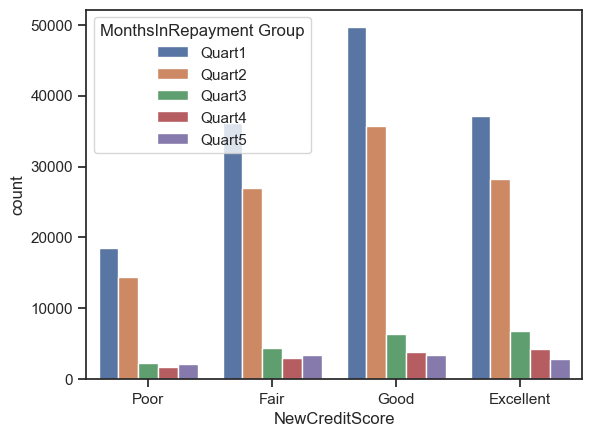

In [551]:
sns.countplot(x="NewCreditScore",hue="MonthsInRepayment Group",data=data)

In [552]:
grouped_data = data.groupby(["NewCreditScore", "MonthsInRepayment Group"]).size().unstack()

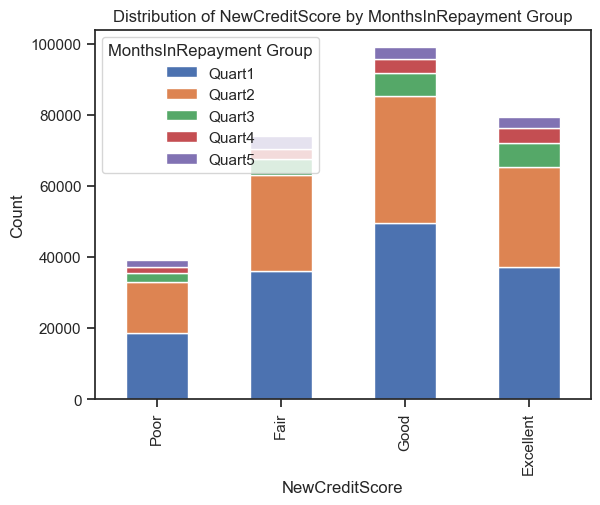

In [553]:
grouped_data.plot(kind="bar", stacked=True)
plt.xlabel("NewCreditScore")
plt.ylabel("Count")
plt.title("Distribution of NewCreditScore by MonthsInRepayment Group")
plt.legend(title="MonthsInRepayment Group")
plt.show()

<AxesSubplot:xlabel='LTV Group', ylabel='count'>

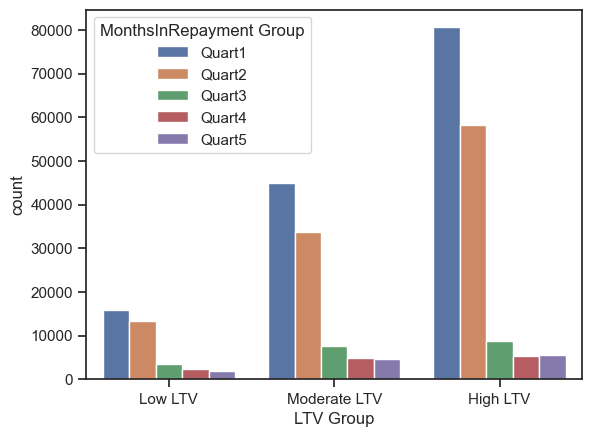

In [554]:
sns.countplot(x="LTV Group",hue="MonthsInRepayment Group",data=data)

<AxesSubplot:xlabel='CreditScore'>

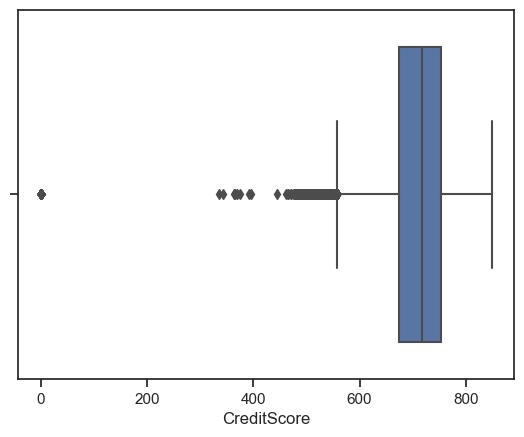

In [555]:
sns.boxplot(data=Final_encoded_data, x="CreditScore")

<AxesSubplot:xlabel='CreditScore'>

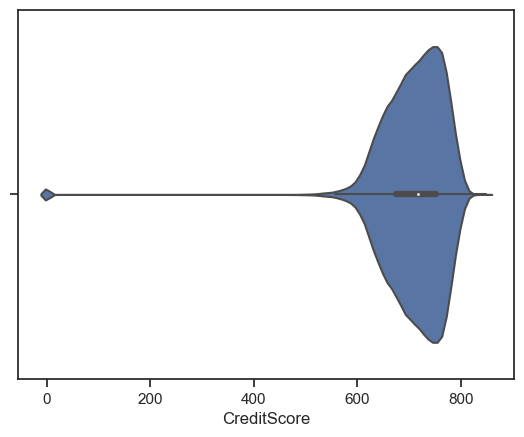

In [556]:
sns.violinplot(data=Final_encoded_data, x="CreditScore")

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DTI'>

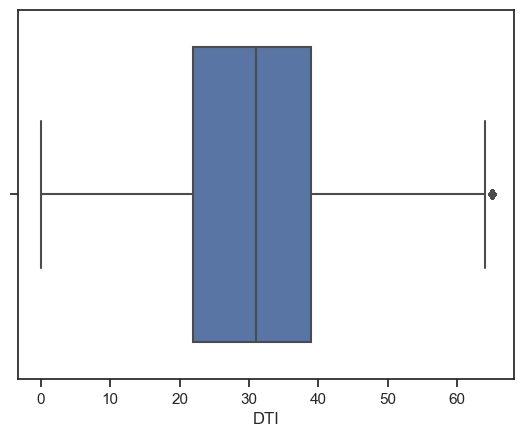

In [557]:
sns.boxplot(data["DTI"])

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='OrigUPB'>

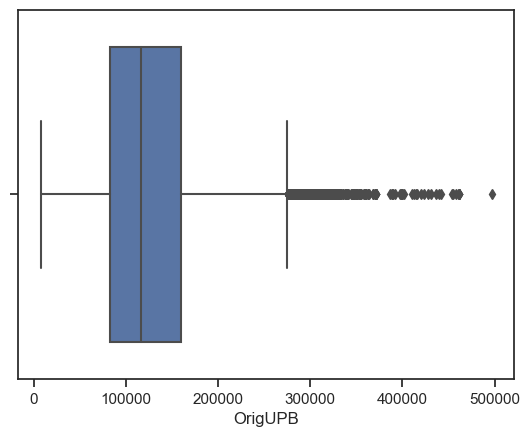

In [558]:
sns.boxplot(data["OrigUPB"])

(array([2.1760e+04, 1.0038e+05, 8.9631e+04, 4.9818e+04, 2.8079e+04,
        1.4200e+03, 2.8700e+02, 5.0000e+01, 1.6000e+01, 1.0000e+01]),
 array([  8000.,  56900., 105800., 154700., 203600., 252500., 301400.,
        350300., 399200., 448100., 497000.]),
 <BarContainer object of 10 artists>)

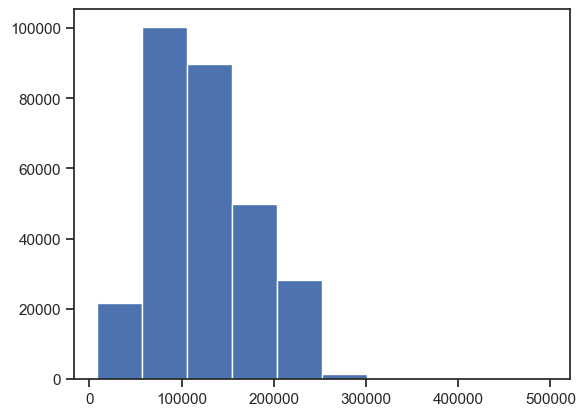

In [559]:
plt.hist(data["OrigUPB"])
# Thers is high unpaid balance which is not good for the lender

(array([19148.,  7684., 28322., 41324., 64535., 55250., 44644., 17537.,
         9674.,  3333.]),
 array([ 0. ,  6.5, 13. , 19.5, 26. , 32.5, 39. , 45.5, 52. , 58.5, 65. ]),
 <BarContainer object of 10 artists>)

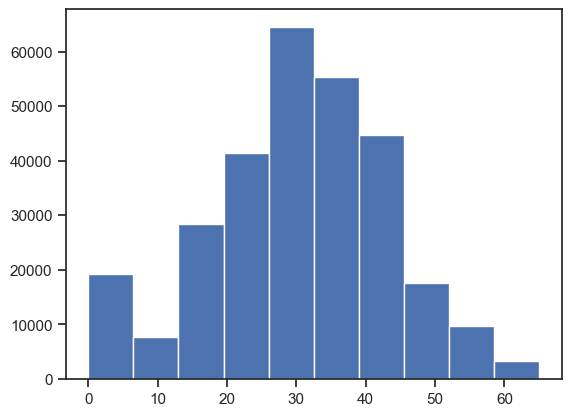

In [560]:
plt.hist(data["DTI"])
# Debit to income ratio is high for more buyers which says it is not good for a lender

In [561]:
Final_encoded_data.head()

CreditScore FirstPaymentDate FirstTimeHomebuyer MaturityDate  \
LoanSeqNum                                                                   
F199Q1268030            0          1999-02                  N      2029-01   
F199Q1015092            0          1999-02                  N      2029-01   
F199Q1266886            0          1999-02                  N      2029-01   
F199Q1178167            0          1999-02                  N      2029-01   
F199Q1178517            0          1999-02                  N      2029-01   

              MSA  MIP  Units  Occupancy  OCLTV  DTI  ...  PropertyType_CO  \
LoanSeqNum                                            ...                    
F199Q1268030   68   25      1          1     89   27  ...                0   
F199Q1015092   95    0      1          1     73   17  ...                0   
F199Q1266886  198    0      1          1     75   16  ...                0   
F199Q1178167  210    0      1          1     76   14  ...                0   
F199Q1178517  250    0      1          1     78   18  ...                0   

              PropertyType_CP  PropertyType_LH  PropertyType_MH  \
LoanSeqNum                                                        
F199Q1268030                0                0                0   
F199Q1015092                0                0                0   
F199Q1266886                0                0                0   
F199Q1178167                0                0                0   
F199Q1178517                0                0                0   

              PropertyType_PU  PropertyType_SF  PropertyType_X   \
LoanSeqNum                                                        
F199Q1268030                0                1                0   
F199Q1015092                0                1                0   
F199Q1266886                0                1                0   
F199Q1178167                0                1                0   
F199Q1178517                0                1                0   

              NewCreditScore  LTV Group  MonthsInRepayment Group  
LoanSeqNum                                                        
F199Q1268030               3          0                        1  
F199Q1015092               3          2                        3  
F199Q1266886               3          2                        1  
F199Q1178167               3          2                        0  
F199Q1178517               3          2                        1  

[5 rows x 38 columns]

In [562]:
Final_encoded_data.describe()

CreditScore            MSA            MIP          Units  \
count  291451.000000  291451.000000  291451.000000  291451.000000   
mean      708.936991     230.144776       9.216685       1.026022   
std        68.408791     122.640635      12.648273       0.202986   
min         0.000000       0.000000       0.000000       0.000000   
25%       675.000000     104.000000       0.000000       1.000000   
50%       717.000000     250.000000       0.000000       1.000000   
75%       753.000000     330.000000      25.000000       1.000000   
max       849.000000     391.000000      55.000000       4.000000   

           Occupancy          OCLTV            DTI        OrigUPB  \
count  291451.000000  291451.000000  291451.000000  291451.000000   
mean        0.992630      76.960529      30.033453  124940.387921   
std         0.229152      15.236154      13.203974   53657.440624   
min         0.000000       0.000000       0.000000    8000.000000   
25%         1.000000      70.000000      22.000000   83000.000000   
50%         1.000000      80.000000      31.000000  117000.000000   
75%         1.000000      90.000000      39.000000  160000.000000   
max         2.000000     110.000000      65.000000  497000.000000   

       OrigInterestRate  PropertyState  ...          PPM_Y  PropertyType_CO  \
count     291451.000000  291451.000000  ...  291451.000000    291451.000000   
mean           6.926547      22.693636  ...       0.013453         0.062103   
std            0.343541      15.694236  ...       0.115206         0.241343   
min            4.000000       0.000000  ...       0.000000         0.000000   
25%            6.750000       9.000000  ...       0.000000         0.000000   
50%            6.875000      21.000000  ...       0.000000         0.000000   
75%            7.125000      36.000000  ...       0.000000         0.000000   
max           12.350000      52.000000  ...       1.000000         1.000000   

       PropertyType_CP  PropertyType_LH  PropertyType_MH  PropertyType_PU  \
count    291451.000000    291451.000000    291451.000000    291451.000000   
mean          0.000247         0.000360         0.002481         0.094376   
std           0.015716         0.018977         0.049745         0.292352   
min           0.000000         0.000000         0.000000         0.000000   
25%           0.000000         0.000000         0.000000         0.000000   
50%           0.000000         0.000000         0.000000         0.000000   
75%           0.000000         0.000000         0.000000         0.000000   
max           1.000000         1.000000         1.000000         1.000000   

       PropertyType_SF  PropertyType_X   NewCreditScore      LTV Group  
count    291451.000000    291451.000000   291451.000000  291451.000000  
mean          0.840357         0.000075        1.337226       0.785892  
std           0.366275         0.008688        1.018347       0.909120  
min           0.000000         0.000000        0.000000       0.000000  
25%           1.000000         0.000000        0.000000       0.000000  
50%           1.000000         0.000000        1.000000       0.000000  
75%           1.000000         0.000000        2.000000       2.000000  
max           1.000000         1.000000        3.000000       2.000000  

[8 rows x 34 columns]

In [563]:
Final_encoded_data.dtypes

CreditScore                    int64
FirstPaymentDate           period[M]
FirstTimeHomebuyer            object
MaturityDate               period[M]
MSA                            int32
MIP                            int64
Units                          int64
Occupancy                      int32
OCLTV                          int64
DTI                            int64
OrigUPB                        int64
OrigInterestRate             float64
PropertyState                  int32
PostalCode                     int32
LoanPurpose                    int32
OrigLoanTerm                   int64
NumBorrowers                   int32
SellerName                     int32
ServicerName                   int32
EverDelinquent                 int64
MonthsDelinquent               int64
Channel_B                      uint8
Channel_C                      uint8
Channel_R                      uint8
Channel_T                      uint8
PPM_N                          uint8
PPM_X                          uint8
P

In [564]:
Final_encoded_data.columns

Index(['CreditScore', 'FirstPaymentDate', 'FirstTimeHomebuyer', 'MaturityDate',
       'MSA', 'MIP', 'Units', 'Occupancy', 'OCLTV', 'DTI', 'OrigUPB',
       'OrigInterestRate', 'PropertyState', 'PostalCode', 'LoanPurpose',
       'OrigLoanTerm', 'NumBorrowers', 'SellerName', 'ServicerName',
       'EverDelinquent', 'MonthsDelinquent', 'Channel_B', 'Channel_C',
       'Channel_R', 'Channel_T', 'PPM_N', 'PPM_X', 'PPM_Y', 'PropertyType_CO',
       'PropertyType_CP', 'PropertyType_LH', 'PropertyType_MH',
       'PropertyType_PU', 'PropertyType_SF', 'PropertyType_X ',
       'NewCreditScore', 'LTV Group', 'MonthsInRepayment Group'],
      dtype='object')

<AxesSubplot:>

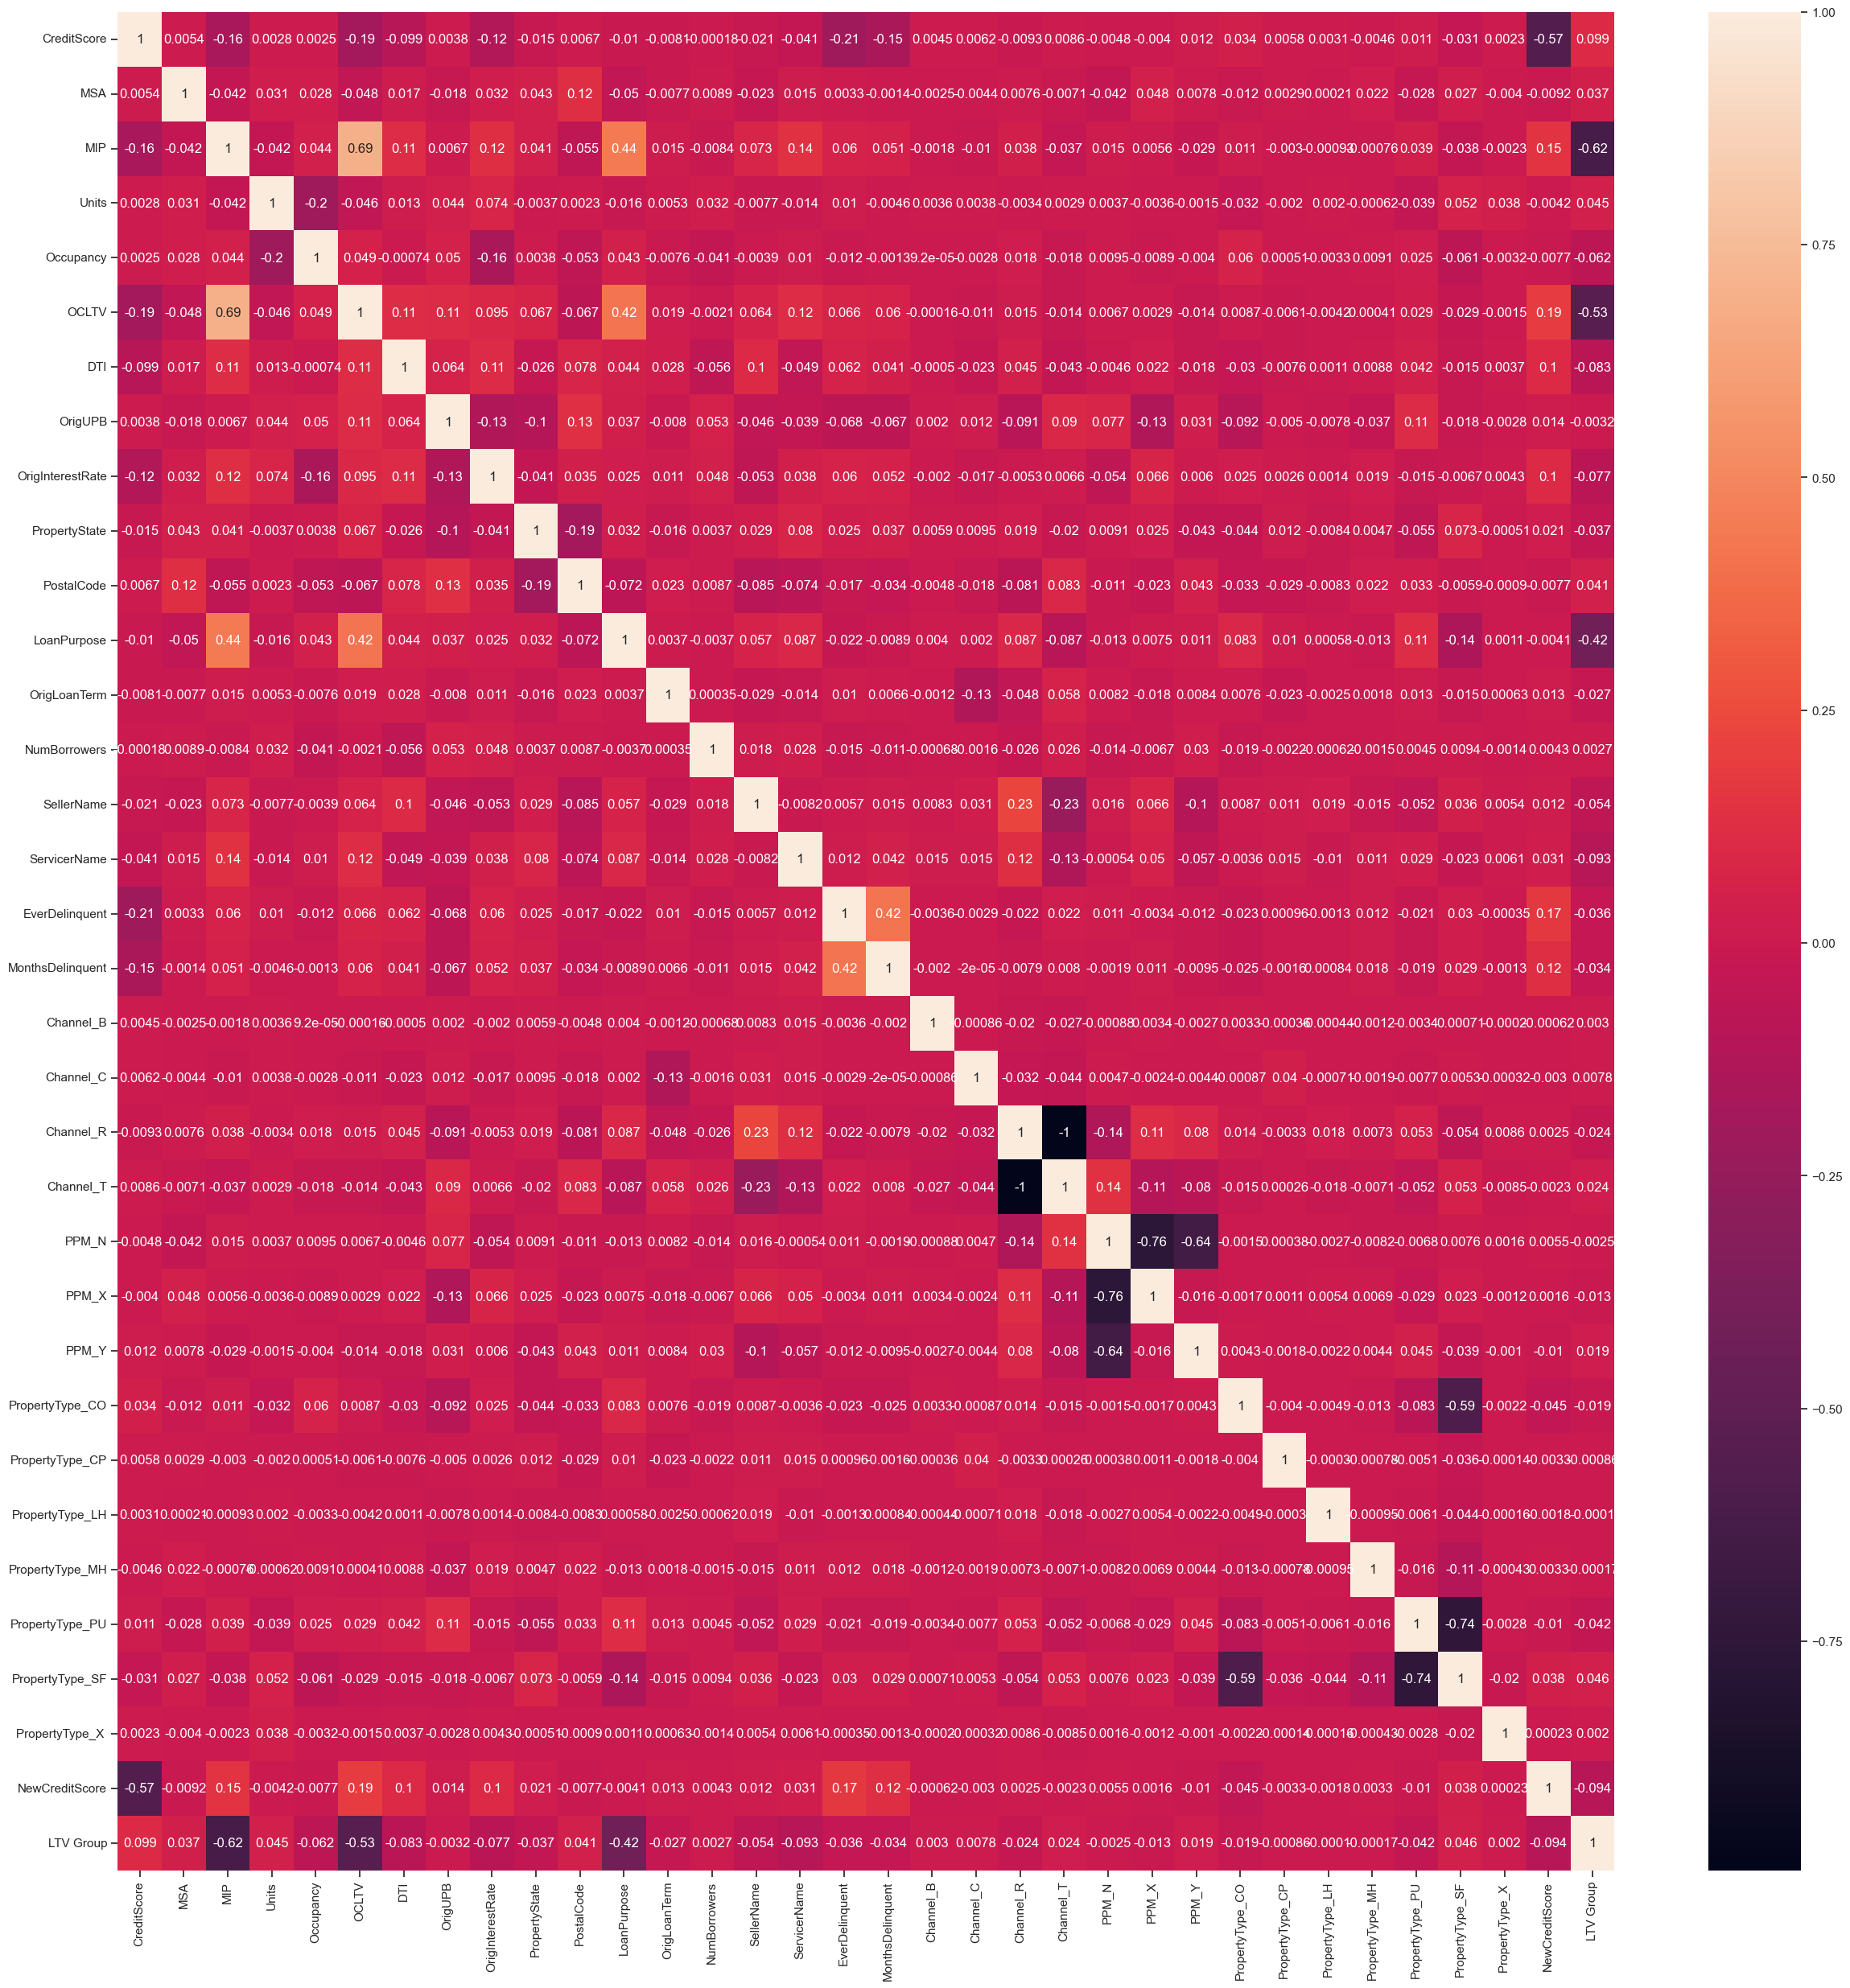

In [565]:
plt.figure(figsize=(30, 30))
correlation_matrix = Final_encoded_data.corr()
sns.heatmap(correlation_matrix, annot=True)

In [566]:
# MSA,Seller Name,Proprty_Type_CP(very less corelated)property_type_x(Very less) are having less corelation with the class label 

In [567]:
X = Final_encoded_data.drop('EverDelinquent', axis=1)  # Features
y = Final_encoded_data['EverDelinquent']  # Target variable

In [568]:
Final_encoded_data['FirstPaymentDate'] = Final_encoded_data['FirstPaymentDate'].dt.to_timestamp().astype('int64')
Final_encoded_data['MaturityDate'] = Final_encoded_data['MaturityDate'].dt.to_timestamp().astype('int64')


In [569]:
non_numeric_columns = X.select_dtypes(exclude=[np.number]).columns

In [570]:
for column in non_numeric_columns:
    unique_values = X[column].unique()
    print(f"Column: {column}\nUnique Values: {unique_values}\n")


Column: FirstPaymentDate
Unique Values: <PeriodArray>
['1999-02', '1999-03', '1999-04', '1999-05', '1999-06', '1999-07', '1999-08',
 '1999-09', '1999-10', '1999-11', '1999-12', '2000-01', '2000-04', '2000-05',
 '2000-06', '2001-05', '2000-09', '2002-04', '2003-03', '2002-12', '2000-07',
 '2000-03', '2002-06', '2000-02', '2000-08', '2001-06', '2000-11', '2001-03',
 '2002-02', '2001-01', '2003-04', '2000-10', '2001-12', '2001-02', '2003-08',
 '2001-07', '2002-10', '2001-04', '2001-10', '2001-08', '2003-09', '2003-05',
 '2002-01', '2001-09', '2001-11', '2003-12', '2004-05', '2002-09', '1999-01',
 '2003-01', '2002-08', '2000-12', '2002-03', '2003-06', '2003-07', '2003-02',
 '2002-05', '2002-07', '2002-11', '2004-01', '2011-11', '2013-03', '2003-10',
 '2003-11', '2004-03', '2004-04']
Length: 66, dtype: period[M]

Column: FirstTimeHomebuyer
Unique Values: ['N' 'X' 'Y']

Column: MaturityDate
Unique Values: <PeriodArray>
['2029-01', '2027-10', '2029-02', '2024-09', '2027-02', '2029-03', '2026-

In [571]:
label_encoder = LabelEncoder()
for column in non_numeric_columns:
    X[column] = label_encoder.fit_transform(X[column])

In [572]:
best_features = SelectKBest(score_func=chi2, k=25).fit(X, y)

In [573]:
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': best_features.scores_})
selected_features = feature_scores.nlargest(25, 'Score')['Feature'].tolist()

In [574]:
display(feature_scores)

Feature         Score
0               CreditScore  8.259904e+04
1          FirstPaymentDate  5.493861e+01
2        FirstTimeHomebuyer  2.346114e+01
3              MaturityDate  4.728800e-03
4                       MSA  2.057292e+02
5                       MIP  1.820773e+04
6                     Units  1.208859e+00
7                 Occupancy  2.329238e+00
8                     OCLTV  3.774875e+03
9                       DTI  6.526476e+03
10                  OrigUPB  3.069602e+07
11         OrigInterestRate  1.812752e+01
12            PropertyState  2.046185e+03
13               PostalCode  1.158417e+04
14              LoanPurpose  6.407168e+01
15             OrigLoanTerm  4.536238e-01
16             NumBorrowers  3.950497e+02
17               SellerName  2.581530e+01
18             ServicerName  1.518177e+02
19         MonthsDelinquent  2.171561e+06
20                Channel_B  3.798509e+00
21                Channel_C  2.428360e+00
22                Channel_R  8.217157e+01
23                Channel_T  6.251978e+01
24                    PPM_N  1.043283e+00
25                    PPM_X  3.320364e+00
26                    PPM_Y  4.257171e+01
27          PropertyType_CO  1.399519e+02
28          PropertyType_CP  2.695289e-01
29          PropertyType_LH  4.617938e-01
30          PropertyType_MH  4.512384e+01
31          PropertyType_PU  1.207442e+02
32          PropertyType_SF  4.277658e+01
33          PropertyType_X   3.561984e-02
34           NewCreditScore  6.581625e+03
35                LTV Group  3.893096e+02
36  MonthsInRepayment Group  1.888162e+04

In [575]:
display(selected_features)


['OrigUPB',
 'MonthsDelinquent',
 'CreditScore',
 'MonthsInRepayment Group',
 'MIP',
 'PostalCode',
 'NewCreditScore',
 'DTI',
 'OCLTV',
 'PropertyState',
 'NumBorrowers',
 'LTV Group',
 'MSA',
 'ServicerName',
 'PropertyType_CO',
 'PropertyType_PU',
 'Channel_R',
 'LoanPurpose',
 'Channel_T',
 'FirstPaymentDate',
 'PropertyType_MH',
 'PropertyType_SF',
 'PPM_Y',
 'SellerName',
 'FirstTimeHomebuyer']

In [576]:
unselected_features = list(set(X.columns) - set(selected_features))

In [577]:
unselected_features

['PPM_N',
 'OrigInterestRate',
 'PropertyType_CP',
 'PPM_X',
 'Channel_B',
 'Units',
 'Occupancy',
 'PropertyType_X ',
 'Channel_C',
 'MaturityDate',
 'PropertyType_LH',
 'OrigLoanTerm']

In [578]:
drop_features = ['PPM_N', 'Channel_B','Units','PPM_X','PropertyType_X ','Occupancy','OrigInterestRate','Channel_C', 'PropertyType_LH','PropertyType_CP','OrigLoanTerm']
df_selected = Final_encoded_data.drop(drop_features, axis=1)

In [579]:
df_selected

CreditScore     FirstPaymentDate FirstTimeHomebuyer  \
LoanSeqNum                                                          
F199Q1268030            0   917827200000000000                  N   
F199Q1015092            0   917827200000000000                  N   
F199Q1266886            0   917827200000000000                  N   
F199Q1178167            0   917827200000000000                  N   
F199Q1178517            0   917827200000000000                  N   
...                   ...                  ...                ...   
F199Q1220925          839   920246400000000000                  N   
F199Q1401332          840  1033430400000000000                  N   
F199Q1401282          840  1049155200000000000                  N   
F199Q1220924          845   922924800000000000                  N   
F199Q1220923          849   920246400000000000                  N   

                     MaturityDate  MSA  MIP  OCLTV  DTI  OrigUPB  \
LoanSeqNum                                                         
F199Q1268030  1861920000000000000   68   25     89   27   117000   
F199Q1015092  1861920000000000000   95    0     73   17   109000   
F199Q1266886  1861920000000000000  198    0     75   16    88000   
F199Q1178167  1861920000000000000  210    0     76   14   160000   
F199Q1178517  1861920000000000000  250    0     78   18   109000   
...                           ...  ...  ...    ...  ...      ...   
F199Q1220925  1864598400000000000  274    0     60   32    90000   
F199Q1401332  1869696000000000000  250    0     73    0   267000   
F199Q1401282  1869696000000000000  323    0     73   31    87000   
F199Q1220924  1867017600000000000  274    0     80   54    88000   
F199Q1220923  1864598400000000000  274    0     47   29    70000   

              PropertyState  ...  Channel_R  Channel_T  PPM_Y  \
LoanSeqNum                   ...                                
F199Q1268030             15  ...          0          1      0   
F199Q1015092              5  ...          1          0      0   
F199Q1266886             17  ...          0          1      0   
F199Q1178167              4  ...          1          0      0   
F199Q1178517             32  ...          1          0      0   
...                     ...  ...        ...        ...    ...   
F199Q1220925             39  ...          1          0      0   
F199Q1401332             35  ...          0          0      0   
F199Q1401282              4  ...          1          0      0   
F199Q1220924             39  ...          1          0      0   
F199Q1220923             39  ...          1          0      0   

              PropertyType_CO  PropertyType_MH  PropertyType_PU  \
LoanSeqNum                                                        
F199Q1268030                0                0                0   
F199Q1015092                0                0                0   
F199Q1266886                0                0                0   
F199Q1178167                0                0                0   
F199Q1178517                0                0                0   
...                       ...              ...              ...   
F199Q1220925                0                0                0   
F199Q1401332                0                0                0   
F199Q1401282                0                0                0   
F199Q1220924                0                0                0   
F199Q1220923                0                0                0   

              PropertyType_SF  NewCreditScore  LTV Group  \
LoanSeqNum                                                 
F199Q1268030                1               3          0   
F199Q1015092                1               3          2   
F199Q1266886                1               3          2   
F199Q1178167                1               3          2   
F199Q1178517                1               3          2   
...                       ...             ...        ...   
F199Q1220925                1    

In [580]:
df_selected.columns

Index(['CreditScore', 'FirstPaymentDate', 'FirstTimeHomebuyer', 'MaturityDate',
       'MSA', 'MIP', 'OCLTV', 'DTI', 'OrigUPB', 'PropertyState', 'PostalCode',
       'LoanPurpose', 'NumBorrowers', 'SellerName', 'ServicerName',
       'EverDelinquent', 'MonthsDelinquent', 'Channel_R', 'Channel_T', 'PPM_Y',
       'PropertyType_CO', 'PropertyType_MH', 'PropertyType_PU',
       'PropertyType_SF', 'NewCreditScore', 'LTV Group',
       'MonthsInRepayment Group'],
      dtype='object')

In [581]:
df_selected.dtypes

CreditScore                   int64
FirstPaymentDate              int64
FirstTimeHomebuyer           object
MaturityDate                  int64
MSA                           int32
MIP                           int64
OCLTV                         int64
DTI                           int64
OrigUPB                       int64
PropertyState                 int32
PostalCode                    int32
LoanPurpose                   int32
NumBorrowers                  int32
SellerName                    int32
ServicerName                  int32
EverDelinquent                int64
MonthsDelinquent              int64
Channel_R                     uint8
Channel_T                     uint8
PPM_Y                         uint8
PropertyType_CO               uint8
PropertyType_MH               uint8
PropertyType_PU               uint8
PropertyType_SF               uint8
NewCreditScore                int32
LTV Group                     int32
MonthsInRepayment Group    category
dtype: object

In [582]:
df_selected['FirstPaymentDate'].isnull().sum()

0

In [583]:
df_selected['FirstPaymentDate'].unique()

array([ 917827200000000000,  920246400000000000,  922924800000000000,
        925516800000000000,  928195200000000000,  930787200000000000,
        933465600000000000,  936144000000000000,  938736000000000000,
        941414400000000000,  944006400000000000,  946684800000000000,
        954547200000000000,  957139200000000000,  959817600000000000,
        988675200000000000,  967766400000000000, 1017619200000000000,
       1046476800000000000, 1038700800000000000,  962409600000000000,
        951868800000000000, 1022889600000000000,  949363200000000000,
        965088000000000000,  991353600000000000,  973036800000000000,
        983404800000000000, 1012521600000000000,  978307200000000000,
       1049155200000000000,  970358400000000000, 1007164800000000000,
        980985600000000000, 1059696000000000000,  993945600000000000,
       1033430400000000000,  986083200000000000, 1001894400000000000,
        996624000000000000, 1062374400000000000, 1051747200000000000,
       1009843200000

In [584]:
df_selected['FirstPaymentDate'] = pd.to_datetime(df_selected['FirstPaymentDate'], unit='ns')


In [585]:
df_selected['MaturityDate'] = pd.to_datetime(df_selected['MaturityDate'], unit='ns')

In [586]:
df_selected.head()

CreditScore FirstPaymentDate FirstTimeHomebuyer MaturityDate  \
LoanSeqNum                                                                   
F199Q1268030            0       1999-02-01                  N   2029-01-01   
F199Q1015092            0       1999-02-01                  N   2029-01-01   
F199Q1266886            0       1999-02-01                  N   2029-01-01   
F199Q1178167            0       1999-02-01                  N   2029-01-01   
F199Q1178517            0       1999-02-01                  N   2029-01-01   

              MSA  MIP  OCLTV  DTI  OrigUPB  PropertyState  ...  Channel_R  \
LoanSeqNum                                                  ...              
F199Q1268030   68   25     89   27   117000             15  ...          0   
F199Q1015092   95    0     73   17   109000              5  ...          1   
F199Q1266886  198    0     75   16    88000             17  ...          0   
F199Q1178167  210    0     76   14   160000              4  ...          1   
F199Q1178517  250    0     78   18   109000             32  ...          1   

              Channel_T  PPM_Y  PropertyType_CO  PropertyType_MH  \
LoanSeqNum                                                         
F199Q1268030          1      0                0                0   
F199Q1015092          0      0                0                0   
F199Q1266886          1      0                0                0   
F199Q1178167          0      0                0                0   
F199Q1178517          0      0                0                0   

              PropertyType_PU  PropertyType_SF  NewCreditScore  LTV Group  \
LoanSeqNum                                                                  
F199Q1268030                0                1               3          0   
F199Q1015092                0                1               3          2   
F199Q1266886                0                1               3          2   
F199Q1178167                0                1               3          2   
F199Q1178517                0                1               3          2   

              MonthsInRepayment Group  
LoanSeqNum                             
F199Q1268030                        1  
F199Q1015092                        3  
F199Q1266886                        1  
F199Q1178167                        0  
F199Q1178517                        1  

[5 rows x 27 columns]

In [587]:
df_selected.isnull().any()

CreditScore                False
FirstPaymentDate           False
FirstTimeHomebuyer         False
MaturityDate               False
MSA                        False
MIP                        False
OCLTV                      False
DTI                        False
OrigUPB                    False
PropertyState              False
PostalCode                 False
LoanPurpose                False
NumBorrowers               False
SellerName                 False
ServicerName               False
EverDelinquent             False
MonthsDelinquent           False
Channel_R                  False
Channel_T                  False
PPM_Y                      False
PropertyType_CO            False
PropertyType_MH            False
PropertyType_PU            False
PropertyType_SF            False
NewCreditScore             False
LTV Group                  False
MonthsInRepayment Group    False
dtype: bool

In [588]:
df_selected.isnull().sum()

CreditScore                0
FirstPaymentDate           0
FirstTimeHomebuyer         0
MaturityDate               0
MSA                        0
MIP                        0
OCLTV                      0
DTI                        0
OrigUPB                    0
PropertyState              0
PostalCode                 0
LoanPurpose                0
NumBorrowers               0
SellerName                 0
ServicerName               0
EverDelinquent             0
MonthsDelinquent           0
Channel_R                  0
Channel_T                  0
PPM_Y                      0
PropertyType_CO            0
PropertyType_MH            0
PropertyType_PU            0
PropertyType_SF            0
NewCreditScore             0
LTV Group                  0
MonthsInRepayment Group    0
dtype: int64

In [589]:
df_selected['LoanDuration'] = df_selected['MaturityDate'] - df_selected['FirstPaymentDate']

In [590]:
df_selected.head(10)

CreditScore FirstPaymentDate FirstTimeHomebuyer MaturityDate  \
LoanSeqNum                                                                   
F199Q1268030            0       1999-02-01                  N   2029-01-01   
F199Q1015092            0       1999-02-01                  N   2029-01-01   
F199Q1266886            0       1999-02-01                  N   2029-01-01   
F199Q1178167            0       1999-02-01                  N   2029-01-01   
F199Q1178517            0       1999-02-01                  N   2029-01-01   
F199Q1224802            0       1999-02-01                  N   2029-01-01   
F199Q1291436            0       1999-02-01                  N   2029-01-01   
F199Q1001824            0       1999-02-01                  X   2029-01-01   
F199Q1079744            0       1999-02-01                  Y   2027-10-01   
F199Q1196318            0       1999-02-01                  Y   2029-01-01   

              MSA  MIP  OCLTV  DTI  OrigUPB  PropertyState  ...  Channel_T  \
LoanSeqNum                                                  ...              
F199Q1268030   68   25     89   27   117000             15  ...          1   
F199Q1015092   95    0     73   17   109000              5  ...          0   
F199Q1266886  198    0     75   16    88000             17  ...          1   
F199Q1178167  210    0     76   14   160000              4  ...          0   
F199Q1178517  250    0     78   18   109000             32  ...          0   
F199Q1224802  391   25     89   40   207000              5  ...          1   
F199Q1291436  391   25     90   21   111000             50  ...          1   
F199Q1001824  262    0     72   20    97000              9  ...          0   
F199Q1079744  151   30     95   38    55000              6  ...          0   
F199Q1196318  377   30     95   27    35000             17  ...          1   

              PPM_Y  PropertyType_CO  PropertyType_MH  PropertyType_PU  \
LoanSeqNum                                                               
F199Q1268030      0                0                0                0   
F199Q1015092      0                0                0                0   
F199Q1266886      0                0                0                0   
F199Q1178167      0                0                0                0   
F199Q1178517      0                0                0                0   
F199Q1224802      0                0                0                0   
F199Q1291436      0                0                0                0   
F199Q1001824      0                0                0                0   
F199Q1079744      0                0                0                0   
F199Q1196318      0                0                0                0   

              PropertyType_SF  NewCreditScore  LTV Group  \
LoanSeqNum                                                 
F199Q1268030                1               3          0   
F199Q1015092                1               3          2   
F199Q1266886                1               3          2   
F199Q1178167                1               3          2   
F199Q1178517                1               3          2   
F199Q1224802                1               3          0   
F199Q1291436                1               3          0   
F199Q1001824                1               3          2   
F199Q1079744                1               3          0   
F199Q1196318                1               3          0   

              MonthsInRepayment Group  LoanDuration  
LoanSeqNum                                           
F199Q1268030                        1    10927 days  
F199Q1015092                        3    10927 days  
F199Q1266886                        1    10927 days  
F199Q1178167                        0    10927 days  
F199Q1178517                        1    10927 days  
F199Q1224802                        0    10927 days  
F199Q1291436                        0    10927 days  
F199Q1001824                        3    109

In [591]:
df_selected.columns

Index(['CreditScore', 'FirstPaymentDate', 'FirstTimeHomebuyer', 'MaturityDate',
       'MSA', 'MIP', 'OCLTV', 'DTI', 'OrigUPB', 'PropertyState', 'PostalCode',
       'LoanPurpose', 'NumBorrowers', 'SellerName', 'ServicerName',
       'EverDelinquent', 'MonthsDelinquent', 'Channel_R', 'Channel_T', 'PPM_Y',
       'PropertyType_CO', 'PropertyType_MH', 'PropertyType_PU',
       'PropertyType_SF', 'NewCreditScore', 'LTV Group',
       'MonthsInRepayment Group', 'LoanDuration'],
      dtype='object')

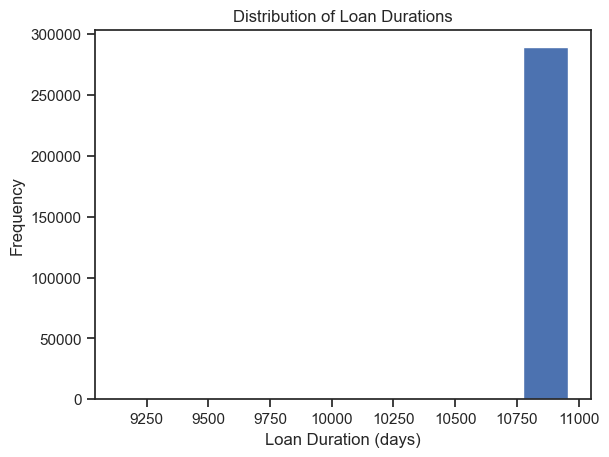

In [592]:
df_selected['LoanDuration_days'] = df_selected['LoanDuration'].dt.days
plt.hist(df_selected['LoanDuration_days'], bins=10)
plt.xlabel('Loan Duration (days)')
plt.ylabel('Frequency')
plt.title('Distribution of Loan Durations')
plt.show()


In [593]:
df_selected.head()

CreditScore FirstPaymentDate FirstTimeHomebuyer MaturityDate  \
LoanSeqNum                                                                   
F199Q1268030            0       1999-02-01                  N   2029-01-01   
F199Q1015092            0       1999-02-01                  N   2029-01-01   
F199Q1266886            0       1999-02-01                  N   2029-01-01   
F199Q1178167            0       1999-02-01                  N   2029-01-01   
F199Q1178517            0       1999-02-01                  N   2029-01-01   

              MSA  MIP  OCLTV  DTI  OrigUPB  PropertyState  ...  PPM_Y  \
LoanSeqNum                                                  ...          
F199Q1268030   68   25     89   27   117000             15  ...      0   
F199Q1015092   95    0     73   17   109000              5  ...      0   
F199Q1266886  198    0     75   16    88000             17  ...      0   
F199Q1178167  210    0     76   14   160000              4  ...      0   
F199Q1178517  250    0     78   18   109000             32  ...      0   

              PropertyType_CO  PropertyType_MH  PropertyType_PU  \
LoanSeqNum                                                        
F199Q1268030                0                0                0   
F199Q1015092                0                0                0   
F199Q1266886                0                0                0   
F199Q1178167                0                0                0   
F199Q1178517                0                0                0   

              PropertyType_SF  NewCreditScore  LTV Group  \
LoanSeqNum                                                 
F199Q1268030                1               3          0   
F199Q1015092                1               3          2   
F199Q1266886                1               3          2   
F199Q1178167                1               3          2   
F199Q1178517                1               3          2   

              MonthsInRepayment Group  LoanDuration  LoanDuration_days  
LoanSeqNum                                                              
F199Q1268030                        1    10927 days              10927  
F199Q1015092                        3    10927 days              10927  
F199Q1266886                        1    10927 days              10927  
F199Q1178167                        0    10927 days              10927  
F199Q1178517                        1    10927 days              10927  

[5 rows x 29 columns]

In [594]:
average_duration_by_purpose = df_selected.groupby('LoanPurpose')['LoanDuration_days'].mean()


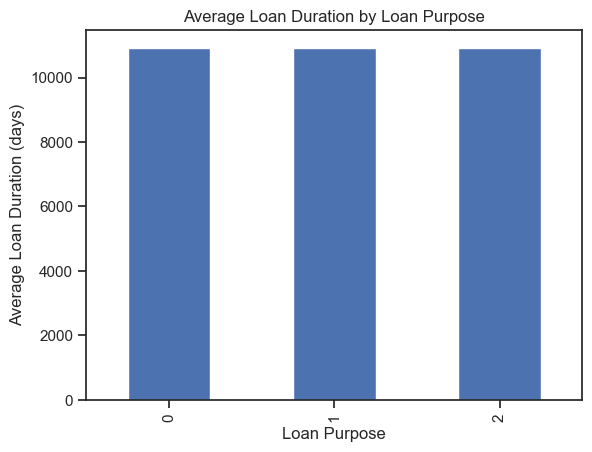

In [595]:
average_duration_by_purpose.plot(kind='bar')
plt.xlabel('Loan Purpose')
plt.ylabel('Average Loan Duration (days)')
plt.title('Average Loan Duration by Loan Purpose')
plt.show()


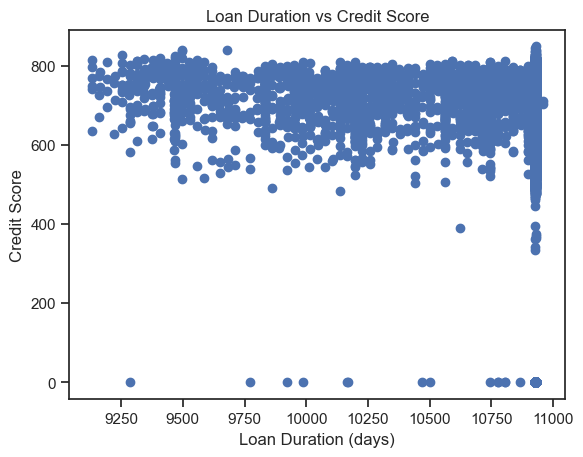

In [596]:
plt.scatter(df_selected['LoanDuration_days'], df_selected['CreditScore'])
plt.xlabel('Loan Duration (days)')
plt.ylabel('Credit Score')
plt.title('Loan Duration vs Credit Score')
plt.show()


In [597]:
df_selected['CreditScore_DTI_Combined'] = df_selected['CreditScore'] * df_selected['DTI']


In [598]:
df_selected.head()

CreditScore FirstPaymentDate FirstTimeHomebuyer MaturityDate  \
LoanSeqNum                                                                   
F199Q1268030            0       1999-02-01                  N   2029-01-01   
F199Q1015092            0       1999-02-01                  N   2029-01-01   
F199Q1266886            0       1999-02-01                  N   2029-01-01   
F199Q1178167            0       1999-02-01                  N   2029-01-01   
F199Q1178517            0       1999-02-01                  N   2029-01-01   

              MSA  MIP  OCLTV  DTI  OrigUPB  PropertyState  ...  \
LoanSeqNum                                                  ...   
F199Q1268030   68   25     89   27   117000             15  ...   
F199Q1015092   95    0     73   17   109000              5  ...   
F199Q1266886  198    0     75   16    88000             17  ...   
F199Q1178167  210    0     76   14   160000              4  ...   
F199Q1178517  250    0     78   18   109000             32  ...   

              PropertyType_CO  PropertyType_MH  PropertyType_PU  \
LoanSeqNum                                                        
F199Q1268030                0                0                0   
F199Q1015092                0                0                0   
F199Q1266886                0                0                0   
F199Q1178167                0                0                0   
F199Q1178517                0                0                0   

              PropertyType_SF  NewCreditScore  LTV Group  \
LoanSeqNum                                                 
F199Q1268030                1               3          0   
F199Q1015092                1               3          2   
F199Q1266886                1               3          2   
F199Q1178167                1               3          2   
F199Q1178517                1               3          2   

              MonthsInRepayment Group  LoanDuration  LoanDuration_days  \
LoanSeqNum                                                               
F199Q1268030                        1    10927 days              10927   
F199Q1015092                        3    10927 days              10927   
F199Q1266886                        1    10927 days              10927   
F199Q1178167                        0    10927 days              10927   
F199Q1178517                        1    10927 days              10927   

              CreditScore_DTI_Combined  
LoanSeqNum                              
F199Q1268030                         0  
F199Q1015092                         0  
F199Q1266886                         0  
F199Q1178167                         0  
F199Q1178517                         0  

[5 rows x 30 columns]

In [599]:
df_selected['CreditScore_DTI_Combined'].value_counts()

0        18950
24480      226
18900      214
27720      210
26676      203
         ...  
48006        1
12264        1
2286         1
29784        1
24621        1
Name: CreditScore_DTI_Combined, Length: 11866, dtype: int64

In [600]:
# Resampling the class counts
class_counts = df_selected['EverDelinquent'].value_counts()
print(class_counts)


0    233788
1     57663
Name: EverDelinquent, dtype: int64


In [601]:
X = df_selected.drop('EverDelinquent', axis=1)
y = df_selected['EverDelinquent']

In [602]:
undersampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X, y)

In [603]:
resampled_class_counts = pd.Series(y_resampled).value_counts()
print(resampled_class_counts)

0    57663
1    57663
Name: EverDelinquent, dtype: int64


In [604]:
y_resampled=pd.DataFrame(y_resampled,columns=["EverDelinquent"])
y_resampled

EverDelinquent
0                    0
1                    0
2                    0
3                    0
4                    0
...                ...
115321               1
115322               1
115323               1
115324               1
115325               1

[115326 rows x 1 columns]

In [605]:
df_sampled=pd.concat([X_resampled,y_resampled],axis=1)
df_sampled.head()

CreditScore FirstPaymentDate FirstTimeHomebuyer MaturityDate  MSA  MIP  \
0          650       1999-05-01                  Y   2029-04-01   95   30   
1          738       1999-04-01                  N   2029-03-01  273    0   
2          784       1999-03-01                  N   2029-02-01  371   25   
3          709       1999-05-01                  N   2029-04-01  307    0   
4          607       2000-10-01                  N   2029-02-01  391    0   

   OCLTV  DTI  OrigUPB  PropertyState  ...  PropertyType_MH  PropertyType_PU  \
0     95   33   212000              5  ...                0                1   
1     80   23   102000             15  ...                0                0   
2     90   13   127000             47  ...                0                0   
3     46   19    60000             46  ...                0                0   
4     69   41    42000             38  ...                0                0   

   PropertyType_SF  NewCreditScore  LTV Group  MonthsInRepayment Group  \
0                0               1          0                        0   
1                1               2          0                        1   
2                1               0          0                        4   
3                0               2          1                        1   
4                1               3          2                        0   

   LoanDuration  LoanDuration_days  CreditScore_DTI_Combined  EverDelinquent  
0    10928 days              10928                     21450               0  
1    10927 days              10927                     16974               0  
2    10930 days              10930                     10192               0  
3    10928 days              10928                     13471               0  
4    10350 days              10350                     24887               0  

[5 rows x 30 columns]

In [606]:
df_sampled.tail()

CreditScore FirstPaymentDate FirstTimeHomebuyer MaturityDate  MSA  \
115321          818       1999-04-01                  N   2029-03-01  282   
115322          819       1999-03-01                  N   2029-02-01  370   
115323          826       1999-03-01                  N   2029-02-01  246   
115324          826       1999-03-01                  N   2029-02-01  250   
115325          838       1999-03-01                  N   2029-02-01  391   

        MIP  OCLTV  DTI  OrigUPB  PropertyState  ...  PropertyType_MH  \
115321    0     65   42    90000              9  ...                0   
115322    0     78   35    91000             23  ...                0   
115323    0     69    0    59000             35  ...                0   
115324    0     58    0    25000             35  ...                0   
115325   12     85   63    42000              5  ...                0   

        PropertyType_PU  PropertyType_SF  NewCreditScore  LTV Group  \
115321                1                0               0          2   
115322                0                1               0          2   
115323                0                0               0          2   
115324                0                0               0          1   
115325                0                1               0          0   

        MonthsInRepayment Group  LoanDuration  LoanDuration_days  \
115321                        3    10927 days              10927   
115322                        1    10930 days              10930   
115323                        1    10930 days              10930   
115324                        1    10930 days              10930   
115325                        0    10930 days              10930   

        CreditScore_DTI_Combined  EverDelinquent  
115321                     34356               1  
115322                     28665               1  
115323                         0               1  
115324                         0               1  
115325                     52794               1  

[5 rows x 30 columns]

In [607]:
df_sampled.head()

CreditScore FirstPaymentDate FirstTimeHomebuyer MaturityDate  MSA  MIP  \
0          650       1999-05-01                  Y   2029-04-01   95   30   
1          738       1999-04-01                  N   2029-03-01  273    0   
2          784       1999-03-01                  N   2029-02-01  371   25   
3          709       1999-05-01                  N   2029-04-01  307    0   
4          607       2000-10-01                  N   2029-02-01  391    0   

   OCLTV  DTI  OrigUPB  PropertyState  ...  PropertyType_MH  PropertyType_PU  \
0     95   33   212000              5  ...                0                1   
1     80   23   102000             15  ...                0                0   
2     90   13   127000             47  ...                0                0   
3     46   19    60000             46  ...                0                0   
4     69   41    42000             38  ...                0                0   

   PropertyType_SF  NewCreditScore  LTV Group  MonthsInRepayment Group  \
0                0               1          0                        0   
1                1               2          0                        1   
2                1               0          0                        4   
3                0               2          1                        1   
4                1               3          2                        0   

   LoanDuration  LoanDuration_days  CreditScore_DTI_Combined  EverDelinquent  
0    10928 days              10928                     21450               0  
1    10927 days              10927                     16974               0  
2    10930 days              10930                     10192               0  
3    10928 days              10928                     13471               0  
4    10350 days              10350                     24887               0  

[5 rows x 30 columns]

In [608]:
df_sampled["EverDelinquent"].value_counts()

0    57663
1    57663
Name: EverDelinquent, dtype: int64

In [609]:
X.dtypes

CreditScore                           int64
FirstPaymentDate             datetime64[ns]
FirstTimeHomebuyer                   object
MaturityDate                 datetime64[ns]
MSA                                   int32
MIP                                   int64
OCLTV                                 int64
DTI                                   int64
OrigUPB                               int64
PropertyState                         int32
PostalCode                            int32
LoanPurpose                           int32
NumBorrowers                          int32
SellerName                            int32
ServicerName                          int32
MonthsDelinquent                      int64
Channel_R                             uint8
Channel_T                             uint8
PPM_Y                                 uint8
PropertyType_CO                       uint8
PropertyType_MH                       uint8
PropertyType_PU                       uint8
PropertyType_SF                 

In [610]:
X['FirstPaymentDate'] = pd.to_datetime(X['FirstPaymentDate'])
X['MaturityDate'] = pd.to_datetime(X['MaturityDate'])

In [611]:
X['FirstTimeHomebuyer'] = le.fit_transform(X['FirstTimeHomebuyer'])

In [612]:
# Select the numerical columns for PCA
numerical_columns = [
    'CreditScore',
    'OCLTV',
    'DTI',
    'OrigUPB',
    'MonthsDelinquent',
    'LoanDuration_days',
    'CreditScore_DTI_Combined',
    'MSA',
    'PropertyState',
    'PostalCode',
    'LoanPurpose',
    'NumBorrowers',
    'SellerName',
    'ServicerName',
    'NewCreditScore',
    'LTV Group',
    'MonthsInRepayment Group'
]
X_numerical = X[numerical_columns]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numerical)

# PCA
pca = PCA(n_components=10)  
X_pca = pca.fit_transform(X_scaled)




In [613]:
# Explained variance ratio
# 10 componenets explaining 87 percent of variance
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained variance ratio:", explained_variance_ratio)

Explained variance ratio: [0.13253993 0.11410587 0.09360027 0.08609152 0.06557283 0.06242721
 0.05993443 0.05854903 0.05647354 0.05271147]


In [614]:
principal_components = pca.components_
print("Principal components:", principal_components)

Principal components: [[ 0.23425779 -0.46100979 -0.43320854 -0.0860961  -0.08721836 -0.03170126
  -0.38361172  0.03941244 -0.03663172  0.02237571 -0.34258368  0.03048216
  -0.12531878 -0.0742813  -0.2495268   0.41603781  0.05898215]
 [-0.24872801  0.26990021 -0.50929978 -0.09242522  0.10212367 -0.01885123
  -0.56096762 -0.0727816   0.1503354  -0.21216021  0.22098819  0.05741643
  -0.0261144   0.19853692  0.20390901 -0.25311489  0.03321303]
 [-0.4171207  -0.18469216  0.14991367 -0.26449627  0.42002559  0.01507283
   0.06144182  0.0602177   0.10673352 -0.05800366 -0.31983335 -0.0604386
   0.07030318  0.02742102  0.40695771  0.23752863  0.40863829]
 [-0.3939727  -0.00493414 -0.04815615  0.37631387 -0.14648098  0.02654953
  -0.13003851  0.05537911 -0.31132158  0.36309375 -0.17063646  0.08396665
  -0.22004249 -0.17425007  0.40368913  0.09499994 -0.37814617]
 [ 0.13101666  0.08538916 -0.07240788  0.00364983  0.36320043  0.24661506
  -0.04469854  0.35597473 -0.28501161  0.50342511  0.14878017

In [615]:
Final_encoded_data.head()

CreditScore    FirstPaymentDate FirstTimeHomebuyer  \
LoanSeqNum                                                         
F199Q1268030            0  917827200000000000                  N   
F199Q1015092            0  917827200000000000                  N   
F199Q1266886            0  917827200000000000                  N   
F199Q1178167            0  917827200000000000                  N   
F199Q1178517            0  917827200000000000                  N   

                     MaturityDate  MSA  MIP  Units  Occupancy  OCLTV  DTI  \
LoanSeqNum                                                                  
F199Q1268030  1861920000000000000   68   25      1          1     89   27   
F199Q1015092  1861920000000000000   95    0      1          1     73   17   
F199Q1266886  1861920000000000000  198    0      1          1     75   16   
F199Q1178167  1861920000000000000  210    0      1          1     76   14   
F199Q1178517  1861920000000000000  250    0      1          1     78   18   

              ...  PropertyType_CO  PropertyType_CP  PropertyType_LH  \
LoanSeqNum    ...                                                      
F199Q1268030  ...                0                0                0   
F199Q1015092  ...                0                0                0   
F199Q1266886  ...                0                0                0   
F199Q1178167  ...                0                0                0   
F199Q1178517  ...                0                0                0   

              PropertyType_MH  PropertyType_PU  PropertyType_SF  \
LoanSeqNum                                                        
F199Q1268030                0                0                1   
F199Q1015092                0                0                1   
F199Q1266886                0                0                1   
F199Q1178167                0                0                1   
F199Q1178517                0                0                1   

              PropertyType_X   NewCreditScore  LTV Group  \
LoanSeqNum                                                 
F199Q1268030                0               3          0   
F199Q1015092                0               3          2   
F199Q1266886                0               3          2   
F199Q1178167                0               3          2   
F199Q1178517                0               3          2   

              MonthsInRepayment Group  
LoanSeqNum                             
F199Q1268030                        1  
F199Q1015092                        3  
F199Q1266886                        1  
F199Q1178167                        0  
F199Q1178517                        1  

[5 rows x 38 columns]

In [616]:
Final_encoded_data["FirstTimeHomebuyer"].unique()

array(['N', 'X', 'Y'], dtype=object)

In [617]:
Final_encoded_data["FirstTimeHomebuyer"]=label_encoder.fit_transform(data["FirstTimeHomebuyer"])
Final_encoded_data["FirstTimeHomebuyer"].unique()

array([0, 1, 2])

In [618]:
Final_encoded_data.head()

CreditScore    FirstPaymentDate  FirstTimeHomebuyer  \
LoanSeqNum                                                          
F199Q1268030            0  917827200000000000                   0   
F199Q1015092            0  917827200000000000                   0   
F199Q1266886            0  917827200000000000                   0   
F199Q1178167            0  917827200000000000                   0   
F199Q1178517            0  917827200000000000                   0   

                     MaturityDate  MSA  MIP  Units  Occupancy  OCLTV  DTI  \
LoanSeqNum                                                                  
F199Q1268030  1861920000000000000   68   25      1          1     89   27   
F199Q1015092  1861920000000000000   95    0      1          1     73   17   
F199Q1266886  1861920000000000000  198    0      1          1     75   16   
F199Q1178167  1861920000000000000  210    0      1          1     76   14   
F199Q1178517  1861920000000000000  250    0      1          1     78   18   

              ...  PropertyType_CO  PropertyType_CP  PropertyType_LH  \
LoanSeqNum    ...                                                      
F199Q1268030  ...                0                0                0   
F199Q1015092  ...                0                0                0   
F199Q1266886  ...                0                0                0   
F199Q1178167  ...                0                0                0   
F199Q1178517  ...                0                0                0   

              PropertyType_MH  PropertyType_PU  PropertyType_SF  \
LoanSeqNum                                                        
F199Q1268030                0                0                1   
F199Q1015092                0                0                1   
F199Q1266886                0                0                1   
F199Q1178167                0                0                1   
F199Q1178517                0                0                1   

              PropertyType_X   NewCreditScore  LTV Group  \
LoanSeqNum                                                 
F199Q1268030                0               3          0   
F199Q1015092                0               3          2   
F199Q1266886                0               3          2   
F199Q1178167                0               3          2   
F199Q1178517                0               3          2   

              MonthsInRepayment Group  
LoanSeqNum                             
F199Q1268030                        1  
F199Q1015092                        3  
F199Q1266886                        1  
F199Q1178167                        0  
F199Q1178517                        1  

[5 rows x 38 columns]

In [619]:
df_selected["EverDelinquent"].value_counts()

0    233788
1     57663
Name: EverDelinquent, dtype: int64

In [620]:
df_sampled.head()

CreditScore FirstPaymentDate FirstTimeHomebuyer MaturityDate  MSA  MIP  \
0          650       1999-05-01                  Y   2029-04-01   95   30   
1          738       1999-04-01                  N   2029-03-01  273    0   
2          784       1999-03-01                  N   2029-02-01  371   25   
3          709       1999-05-01                  N   2029-04-01  307    0   
4          607       2000-10-01                  N   2029-02-01  391    0   

   OCLTV  DTI  OrigUPB  PropertyState  ...  PropertyType_MH  PropertyType_PU  \
0     95   33   212000              5  ...                0                1   
1     80   23   102000             15  ...                0                0   
2     90   13   127000             47  ...                0                0   
3     46   19    60000             46  ...                0                0   
4     69   41    42000             38  ...                0                0   

   PropertyType_SF  NewCreditScore  LTV Group  MonthsInRepayment Group  \
0                0               1          0                        0   
1                1               2          0                        1   
2                1               0          0                        4   
3                0               2          1                        1   
4                1               3          2                        0   

   LoanDuration  LoanDuration_days  CreditScore_DTI_Combined  EverDelinquent  
0    10928 days              10928                     21450               0  
1    10927 days              10927                     16974               0  
2    10930 days              10930                     10192               0  
3    10928 days              10928                     13471               0  
4    10350 days              10350                     24887               0  

[5 rows x 30 columns]

In [621]:
df_sampled["FirstTimeHomebuyer"]=label_encoder.fit_transform(df_sampled["FirstTimeHomebuyer"])
df_sampled["FirstTimeHomebuyer"].unique()

array([2, 0, 1])

In [622]:
df_sampled.dtypes

CreditScore                           int64
FirstPaymentDate             datetime64[ns]
FirstTimeHomebuyer                    int32
MaturityDate                 datetime64[ns]
MSA                                   int32
MIP                                   int64
OCLTV                                 int64
DTI                                   int64
OrigUPB                               int64
PropertyState                         int32
PostalCode                            int32
LoanPurpose                           int32
NumBorrowers                          int32
SellerName                            int32
ServicerName                          int32
MonthsDelinquent                      int64
Channel_R                             uint8
Channel_T                             uint8
PPM_Y                                 uint8
PropertyType_CO                       uint8
PropertyType_MH                       uint8
PropertyType_PU                       uint8
PropertyType_SF                 

In [623]:
df_preprocessed = df_sampled.copy()

In [624]:
# Convert FirstPaymentDate and MaturityDate to numerical representations
df_preprocessed['FirstPaymentYear'] = df_preprocessed['FirstPaymentDate'].dt.year
df_preprocessed['FirstPaymentMonth'] = df_preprocessed['FirstPaymentDate'].dt.month
df_preprocessed['MaturityYear'] = df_preprocessed['MaturityDate'].dt.year
df_preprocessed['MaturityMonth'] = df_preprocessed['MaturityDate'].dt.month

In [625]:
df_preprocessed['LoanDuration_days'] = df_preprocessed['LoanDuration'].dt.days

In [626]:
df_preprocessed.drop('LoanDuration', axis=1, inplace=True)

In [627]:
# Drop the original date columns
df_preprocessed.drop(['FirstPaymentDate', 'MaturityDate'], axis=1, inplace=True)

In [628]:
# Encode categorical variables
encoder = LabelEncoder()
df_preprocessed['MonthsInRepayment Group'] = encoder.fit_transform(df_preprocessed['MonthsInRepayment Group'])

In [629]:

X = df_preprocessed.drop('EverDelinquent', axis=1)
y = df_preprocessed['EverDelinquent']

In [630]:
# x_train = x_train.drop(["LoanDuration"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [631]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)


GaussianNB()

In [632]:
y_pred = naive_bayes.predict(X_test)

In [633]:
# Evaluation
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion_mat)

Accuracy: 0.7174195786005376
Confusion Matrix:
 [[11647    49]
 [ 6469  4901]]


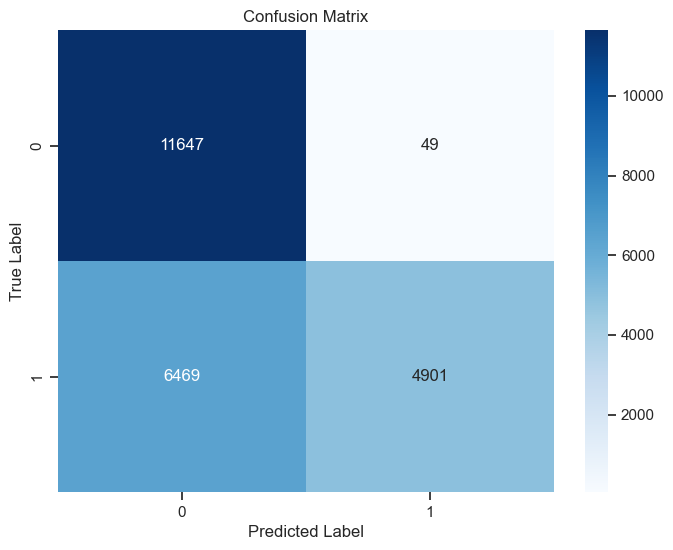

In [634]:
classes = np.unique(np.concatenate((y_test, y_pred)))
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [635]:
# # SVM
# svm = SVC(kernel='linear')
# svm.fit(X_train, y_train)

In [636]:
df_preprocessed['EverDelinquent'].value_counts()

0    57663
1    57663
Name: EverDelinquent, dtype: int64

In [637]:
df_preprocessed.shape

(115326, 31)

In [638]:
df_zeros = df_preprocessed[df_preprocessed['EverDelinquent'] == 0]
df_ones = df_preprocessed[df_preprocessed['EverDelinquent'] == 1]
downsampling_size = 25000

In [639]:
# Downsampling both classes to the desired size
df_zeros_downsampled = resample(df_zeros,
                                   replace=False,
                                   n_samples=downsampling_size,
                                   random_state=42)
df_ones_downsampled = resample(df_ones,
                                   replace=False,
                                   n_samples=downsampling_size,
                                   random_state=42)


In [640]:
df_downsampled = pd.concat([df_zeros_downsampled, df_ones_downsampled])

In [641]:
df_downsampled['EverDelinquent'].value_counts()

0    25000
1    25000
Name: EverDelinquent, dtype: int64

In [642]:
df_downsampled.shape

(50000, 31)

In [643]:
# Shuffling the dataset
df_downsampled = df_downsampled.sample(frac=1, random_state=42)


In [644]:
X_svm = df_downsampled.drop('EverDelinquent', axis=1)
y_svm= df_downsampled['EverDelinquent']

In [645]:
X_train, X_test, y_train, y_test = train_test_split(X_svm, y_svm, test_size=0.2, random_state=42)

In [646]:
# Apply SVM on the downsampled dataset
svm = SVC()
svm.fit(X_train, y_train)

SVC()

In [647]:
# Perform prediction or further evaluation on the test set
y_pred = svm.predict(X_test)

In [648]:
# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5297


In [649]:
# Applying GNB on downsampled data
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [650]:
y_pred = gnb.predict(X_test)

In [651]:
# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7125


In [652]:
df_preprocessed.head()

CreditScore  FirstTimeHomebuyer  MSA  MIP  OCLTV  DTI  OrigUPB  \
0          650                   2   95   30     95   33   212000   
1          738                   0  273    0     80   23   102000   
2          784                   0  371   25     90   13   127000   
3          709                   0  307    0     46   19    60000   
4          607                   0  391    0     69   41    42000   

   PropertyState  PostalCode  LoanPurpose  ...  NewCreditScore  LTV Group  \
0              5         717            2  ...               1          0   
1             15         534            2  ...               2          0   
2             47         111            1  ...               0          0   
3             46         762            0  ...               2          1   
4             38         867            0  ...               3          2   

   MonthsInRepayment Group  LoanDuration_days  CreditScore_DTI_Combined  \
0                        0              10928                     21450   
1                        1              10927                     16974   
2                        4              10930                     10192   
3                        1              10928                     13471   
4                        0              10350                     24887   

   EverDelinquent  FirstPaymentYear  FirstPaymentMonth  MaturityYear  \
0               0              1999                  5          2029   
1               0              1999                  4          2029   
2               0              1999                  3          2029   
3               0              1999                  5          2029   
4               0              2000                 10          2029   

   MaturityMonth  
0              4  
1              3  
2              2  
3              4  
4              2  

[5 rows x 31 columns]

In [653]:
df_preprocessed.shape

(115326, 31)

In [654]:
# Applying PCA to df_preprocessed

In [655]:
df_preprocessed.dtypes

CreditScore                 int64
FirstTimeHomebuyer          int32
MSA                         int32
MIP                         int64
OCLTV                       int64
DTI                         int64
OrigUPB                     int64
PropertyState               int32
PostalCode                  int32
LoanPurpose                 int32
NumBorrowers                int32
SellerName                  int32
ServicerName                int32
MonthsDelinquent            int64
Channel_R                   uint8
Channel_T                   uint8
PPM_Y                       uint8
PropertyType_CO             uint8
PropertyType_MH             uint8
PropertyType_PU             uint8
PropertyType_SF             uint8
NewCreditScore              int32
LTV Group                   int32
MonthsInRepayment Group     int64
LoanDuration_days           int64
CreditScore_DTI_Combined    int64
EverDelinquent              int64
FirstPaymentYear            int64
FirstPaymentMonth           int64
MaturityYear  

In [656]:
X = df_preprocessed.drop('EverDelinquent', axis=1)
y = df_preprocessed['EverDelinquent']

In [657]:
# Apply PCA
pca = PCA(n_components=2) 
X_pca = pca.fit_transform(X)

In [658]:
explained_variance_ratio = pca.explained_variance_ratio_
for i, ratio in enumerate(explained_variance_ratio):
    print(f"Explained variance ratio of PC{i+1}: {ratio:.2f}")

Explained variance ratio of PC1: 0.97
Explained variance ratio of PC2: 0.03


In [659]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [660]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb_accuracy = gnb.score(X_test, y_test)


In [661]:
print(gnb_accuracy)

0.5320384982224919


In [662]:
# Now applying PCA on downsampled data 

In [663]:
df_downsampled.shape

(50000, 31)

In [664]:
X = df_downsampled.drop('EverDelinquent', axis=1)
y = df_downsampled['EverDelinquent']

In [665]:
# Apply PCA
pca = PCA(n_components=2) 
X_pca = pca.fit_transform(X)

In [666]:
explained_variance_ratio = pca.explained_variance_ratio_
for i, ratio in enumerate(explained_variance_ratio):
    print(f"Explained variance ratio of PC{i+1}: {ratio:.2f}")

Explained variance ratio of PC1: 0.97
Explained variance ratio of PC2: 0.03


In [667]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [668]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb_accuracy = gnb.score(X_test, y_test)

In [669]:
print(gnb_accuracy)

0.5327


In [670]:
svm = SVC()
svm.fit(X_train, y_train)
svm_accuracy = svm.score(X_test, y_test)

In [671]:
print(svm_accuracy)

0.5323


In [672]:
X_pca=pd.DataFrame(X_pca,columns=["pc1","pc2"])
X_pca.dtypes

pc1    float64
pc2    float64
dtype: object

In [673]:
pca_df=pd.concat([downsampled_df, X_pca],axis=1)

In [674]:
x1=pca_df.drop("EverDelinquent",axis=1)

In [675]:
X_pca.shape

(50000, 2)

In [676]:
X_train, X_test, y_train, y_test = train_test_split(x1, y, test_size=0.2, random_state=42)

In [677]:
X_train.isnull().any()

CreditScore                 False
FirstTimeHomebuyer          False
MSA                         False
MIP                         False
OCLTV                       False
DTI                         False
OrigUPB                     False
PropertyState               False
PostalCode                  False
LoanPurpose                 False
NumBorrowers                False
SellerName                  False
ServicerName                False
MonthsDelinquent            False
Channel_R                   False
Channel_T                   False
PPM_Y                       False
PropertyType_CO             False
PropertyType_MH             False
PropertyType_PU             False
PropertyType_SF             False
NewCreditScore              False
LTV Group                   False
MonthsInRepayment Group     False
LoanDuration_days           False
CreditScore_DTI_Combined    False
FirstPaymentYear            False
FirstPaymentMonth           False
MaturityYear                False
MaturityMonth 

In [678]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb_accuracy = gnb.score(X_test, y_test)
print(gnb_accuracy)

0.7147


In [679]:
svm = SVC()
svm.fit(X_train, y_train)
svm_accuracy = svm.score(X_test, y_test)

In [680]:
print(svm_accuracy)

0.5307


In [685]:
fa = FactorAnalysis(n_components=20) 
fa.fit(X)
X_fa = fa.transform(X)

In [686]:
X_train, X_test, y_train, y_test = train_test_split(X_fa, y, test_size=0.2, random_state=42)

In [687]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb_accuracy = gnb.score(X_test, y_test)
print(gnb_accuracy)

0.6311


In [688]:
svm = SVC()
svm.fit(X_train, y_train)
svm_accuracy = svm.score(X_test, y_test)
print(svm_accuracy)

0.9679
